
![logo](https://github.com/user-attachments/assets/cf81b6e0-f4b2-4403-9020-2e0199172c06)   

# Datathon: Projeto Passos Magicos


## Introdu√ß√£o da Atividade

O Datathon tem como objetivo criar propostas baseadas em dados para evidenciar o impacto da ONG Passos M√°gicos na transforma√ß√£o social de crian√ßas e jovens em situa√ß√£o de vulnerabilidade.

A ONG promove a educa√ß√£o como ferramenta de mudan√ßa, atendendo alunos do munic√≠pio de Embu-Gua√ßu. A competi√ß√£o oferece duas possibilidades de entrega:

### Proposta Anal√≠tica:

Criar um dashboard interativo e storytelling que demonstre os impactos da ONG.
Analisar o desempenho dos estudantes e criar indicadores √∫teis para a tomada de decis√£o.
Entregar insights sobre o perfil socioecon√¥mico e educacional dos alunos.

### Proposta Preditiva:

Desenvolver um modelo preditivo para analisar o comportamento dos estudantes.
Utilizar t√©cnicas como machine learning ou deep learning para propor solu√ß√µes inovadoras.
Realizar o deploy do modelo preditivo em uma plataforma como Streamlit.
Os participantes podem optar por entregar apenas uma proposta ou ambas. A entrega deve conter o relat√≥rio e/ou modelo preditivo implementado com links no GitHub.



A Associa√ß√£o Passos M√°gicos √© uma organiza√ß√£o sem fins lucrativos que atua desde 1992 com o objetivo de transformar a vida de crian√ßas e jovens em situa√ß√£o de vulnerabilidade social no munic√≠pio de Embu-Gua√ßu. Fundada por Michelle Flues Ivanoff, Dimitri Ivanoff e colaboradores, a ONG surgiu do desejo de oferecer oportunidades educativas e culturais que promovam autonomia e impacto positivo na comunidade. O projeto cresceu de a√ß√µes volunt√°rias em orfanatos para uma associa√ß√£o formal em 2016, permitindo a amplia√ß√£o de suas atividades.

### **Miss√£o, Vis√£o e Princ√≠pios**

* Miss√£o: Transformar vidas por meio da educa√ß√£o, oferecendo ferramentas para criar oportunidades de um futuro digno.
* Vis√£o: Construir um Brasil em que todas as crian√ßas e jovens tenham as mesmas condi√ß√µes para realizar seus sonhos e se tornem agentes transformadores.
* Princ√≠pios: Amor ao pr√≥ximo, empatia, gratid√£o, pertencimento, busca pelo saber, e educa√ß√£o que transforma.

### **Metodologia e Etapas**

A metodologia da Passos M√°gicos √© baseada em quatro pilares principais:

1. Educa√ß√£o de Qualidade: Aulas de portugu√™s, matem√°tica, ingl√™s e alfabetiza√ß√£o, com turmas organizadas de acordo com o n√≠vel de conhecimento, e n√£o por idade. Isso √© complementado por aulas interativas e din√¢micas que incentivam o aprendizado e a curiosidade.
2. Assist√™ncia Psicol√≥gica: Oferece suporte emocional para alunos e familiares, com acompanhamento individual e em grupo, al√©m de oficinas para melhorar relacionamentos interpessoais.
3. Amplia√ß√£o da Vis√£o de Mundo: Realiza√ß√£o de atividades extracurriculares como visitas a museus, parques e eventos culturais, que expandem o horizonte das crian√ßas.
4. Protagonismo: Alunos s√£o incentivados a desenvolver autonomia e liderar iniciativas dentro da ONG, incluindo a possibilidade de bolsas em escolas particulares e universidades para aqueles com bom desempenho.

### **A ONG implementa programas inovadores como:**

* Programa de Acelera√ß√£o do Conhecimento (PAC): Uma jornada educacional com 7 fases e foco no desenvolvimento integral, oferecendo aulas complementares, suporte psicol√≥gico e bolsas de estudos.
* Parcerias Estrat√©gicas: Colabora√ß√µes com institui√ß√µes como USP (Programa Paid√©ia), SENAI, FIAP e empresas privadas como Ita√∫, Santander, e Est√°cio de S√°. Essas parcerias possibilitam bolsas, treinamentos e acesso a tecnologias para potencializar o impacto educacional.

# Conhecendo os dados

### 1. Importando Bibliotecas:

In [321]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### 2. Carregando e Explorando os Dados:

In [322]:
df = pd.read_csv('https://raw.githubusercontent.com/Tamireees/Datathon-Projeto-Passos-Magicos/refs/heads/main/dados/PEDE_PASSOS_DATASET_FIAP.csv', sep=';')

* *Identificamos que seria ben√©fico dividir os dados por ano, pois essa abordagem nos permitiria obter uma visualiza√ß√£o mais clara e detalhada das informa√ß√µes, al√©m de facilitar uma an√°lise mais precisa ao observar as varia√ß√µes e tend√™ncias ao longo de diferentes per√≠odos.*

### Cria√ß√£o de fun√ß√µes:
(para dividir os dataframes, realizar a limpeza dos dados, gerar o mapa de correla√ß√£o e criar o gr√°fico de contagem)

In [323]:
def filter_columns(df, filters: list): # adiciono no array o padr√£o que existe nas colunas e que n√£o quero que tenha na sa√≠da final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]


In [324]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha n√£o remove
  return _df

In [325]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

In [326]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

## 2020

### **Conhecendo os dados:**

In [327]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020 = cleaning_dataset(df_2020)
df_2020.head()

INSTITUICAO_ENSINO_ALUNO_2020     NOME IDADE_ALUNO_2020 ANOS_PM_2020  \
0                Escola P√∫blica  ALUNO-1               11            2   
2                Escola P√∫blica  ALUNO-3               12            2   
3                Escola P√∫blica  ALUNO-4               10            2   
4                Escola P√∫blica  ALUNO-5               10            1   
7            Rede Decis√£o/Uni√£o  ALUNO-8               14            3   

  FASE_TURMA_2020 PONTO_VIRADA_2020          INDE_2020 INDE_CONCEITO_2020  \
0              2H               N√£o           7.883752                  B   
2              3H               N√£o  7.856389666666666                  B   
3              1D               N√£o           5.076252                  D   
4              2M               N√£o           8.077085                  B   
7              4L               Sim  8.381390666666666                  B   

  PEDRA_2020                                  DESTAQUE_IEG_2020  \
0   Ametista  Seu destaque em 2020: A sua boa entrega das li...   
2   Ametista  Seu destaque em 2020: A sua boa entrega das li...   
3    Quartzo  Ponto a melhorar em 2021: Melhorar a sua entre...   
4   Ametista  Seu destaque em 2020: A sua boa entrega das li...   
7   Ametista  Seu destaque em 2020: A sua boa entrega das li...   

                                   DESTAQUE_IDA_2020  \
0  Ponto a melhorar em 2021: Empenhar-se mais nas...   
2  Ponto a melhorar em 2021: Empenhar-se mais nas...   
3  Ponto a melhorar em 2021: Empenhar-se mais nas...   
4  Seu destaque em 2020: As suas boas notas na Pa...   
7  Ponto a melhorar em 2021: Empenhar-se mais nas...   

                                   DESTAQUE_IPV_2020           IAA_2020  \
0  Seu destaque em 2020: A sua boa integra√ß√£o aos...  8.500020000000001   
2  Seu destaque em 2020: A sua boa integra√ß√£o aos...            7.91667   
3  Ponto a melhorar em 2021: Integrar-se mais aos...  8.000020000000001   
4  Seu destaque em 2020: A sua boa integra√ß√£o aos...            7.50002   
7  Seu destaque em 2020: A sua boa integra√ß√£o aos...            8.33334   

  IEG_2020 IPS_2020           IDA_2020           IPP_2020           IPV_2020  \
0      8.7      7.5                  7             5.9375               7.75   
2      8.9      7.5                5.5              8.125  8.111113333333334   
3      4.1    6.875                  0             7.1875               7.75   
4        8      7.5                7.5             8.4375           8.166665   
7      9.9    4.375  7.333333333333333  8.749999999999998            8.94445   

  IAN_2020  
0       10  
2       10  
3        5  
4       10  
7       10

In [328]:
df_2020_clean = df_2020


In [329]:
df_2020_clean = df_2020_clean[df_2020_clean['PEDRA_2020'] != 'D9891/2A']

### **Limpeza dos dados:**

In [330]:
# Alterando a quantidade de anos que estao no Passos Magicos, para o ano correspondente. E alterando o nome da coluna:
ano_map_2020 = {
2020: '0',
2019: '1',
2018: '2',
2017: '3',
2016: '4',
None: 'D971'
}

reverse_ano_map_2020 = {v: k for k, v in ano_map_2020.items()}
df_2020_clean['ANOS_PM_2020'] = (df_2020_clean['ANOS_PM_2020'].map(reverse_ano_map_2020))

df_2020_clean.rename(columns={'ANOS_PM_2020': 'ANO_INGRESSO_2020'}, inplace=True)

df_2020_clean['ANO_INGRESSO_2020'] = pd.to_datetime(df_2020_clean['ANO_INGRESSO_2020'], format='%Y')
# Extraindo apenas o ano
df_2020_clean['ANO_INGRESSO_2020'] = df_2020_clean['ANO_INGRESSO_2020'].dt.year

In [331]:
# Separando a parte num√©rica e a parte alfab√©tica
df_2020_clean['FASE_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('(\d+)')  # Captura os n√∫meros
df_2020_clean['TURMA_2020'] = df_2020_clean['FASE_TURMA_2020'].str.extract('([A-Za-z]+)')  # Captura as letras



In [332]:
# Transformar as colunas de categorias em valores bin√°rios (0 e 1)
df_2020_clean['PONTO_VIRADA_2020'] = df_2020_clean['PONTO_VIRADA_2020'].apply(lambda x: 1 if x == 'Sim' else 0)

In [333]:
df_2020_clean['INDE_2020'] = pd.to_numeric(df_2020_clean['INDE_2020'], errors='coerce')

In [334]:
df_2020_clean['PEDRA_2020'] = pd.Categorical(df_2020_clean['PEDRA_2020'])

In [335]:
# N√£o tem defini√ß√£o essa coluna.
df_2020_clean['INDE_CONCEITO_2020'].unique()

array(['B', 'D', 'A', 'C'], dtype=object)

In [336]:
df_2020_clean['DESTAQUE_IPV_2020'] = df_2020_clean['DESTAQUE_IPV_2020'].apply(lambda x: 1 if isinstance(x, str) and 'Seu destaque em 2020:' in x else 0)
df_2020_clean['DESTAQUE_IDA_2020'] = df_2020_clean['DESTAQUE_IDA_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)
df_2020_clean['DESTAQUE_IEG_2020'] = df_2020_clean['DESTAQUE_IEG_2020'].apply(lambda x: 1 if 'Seu destaque' in x else 0)


In [337]:
df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']] = df_2020_clean[['IAA_2020', 'IEG_2020', 'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020']].apply(pd.to_numeric, errors='coerce')

In [338]:
df_2020_clean = df_2020_clean.drop(columns=['TURMA_2020', 'FASE_TURMA_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'INDE_CONCEITO_2020'])

## 2021

### **Conhecendo os dados:**

In [339]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

NOME  FASE_2021 TURMA_2021 INSTITUICAO_ENSINO_ALUNO_2021  \
0    ALUNO-1        2.0          G                  Rede Decis√£o   
2    ALUNO-3        3.0          F                Escola P√∫blica   
4    ALUNO-5        2.0          L                Escola P√∫blica   
7    ALUNO-8        5.0          L                  Rede Decis√£o   
10  ALUNO-11        1.0          A                  Rede Decis√£o   

   SINALIZADOR_INGRESSANTE_2021 PEDRA_2021 INDE_2021  IAA_2021  IEG_2021  \
0                   Ingressante   Ametista     7.319       7.5       6.3   
2                      Veterano   Ametista     7.021       7.1       6.9   
4                      Veterano   Ametista     7.399       7.4       7.5   
7                      Veterano    Top√°zio     8.269       8.8       8.6   
10                     Veterano    Top√°zio     8.990       9.0      10.0   

    IPS_2021  ...  IPP_2021          REC_EQUIPE_1_2021      REC_EQUIPE_2_2021  \
0        6.9  ...       7.7          Promovido de Fase      Promovido de Fase   
2        6.3  ...       7.3          Promovido de Fase      Promovido de Fase   
4        7.5  ...       8.5          Promovido de Fase  Mantido na Fase atual   
7        7.5  ...       8.0  Promovido de Fase + Bolsa      Promovido de Fase   
10       6.3  ...       7.7          Promovido de Fase  Mantido na Fase atual   

        REC_EQUIPE_3_2021      REC_EQUIPE_4_2021 PONTO_VIRADA_2021 IPV_2021  \
0   Mantido na Fase atual           N√£o avaliado               N√£o      8.1   
2   Mantido na Fase atual           N√£o avaliado               N√£o      7.2   
4   Mantido na Fase atual           N√£o avaliado               N√£o      7.4   
7       Promovido de Fase  Mantido na Fase atual               N√£o      8.5   
10  Mantido na Fase atual           N√£o avaliado               Sim      9.7   

    IAN_2021       NIVEL_IDEAL_2021 DEFASAGEM_2021  
0        5.0  N√≠vel 3 (7o e 8o ano)           -1.0  
2       10.0  N√≠vel 3 (7o e 8o ano)            0.0  
4       10.0  N√≠vel 2 (5o e 6o ano)            0.0  
7       10.0        N√≠vel 5 (1o EM)            0.0  
10      10.0       N√≠vel 1 (4o ano)            0.0  

[5 rows x 21 columns]

### **Limpeza dos dados:**

In [340]:
df_2021_clean = df_2021


In [341]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].value_counts()

SINALIZADOR_INGRESSANTE_2021
Veterano       437
Ingressante    249
Name: count, dtype: int64

In [342]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].isnull().sum()

np.int64(0)

In [343]:
df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] = df_2021_clean['SINALIZADOR_INGRESSANTE_2021'].apply(lambda x: 2021 if isinstance(x, str) and 'Ingressante' in x else 'Veterano')
df_ano_veterano = df_2021_clean[df_2021_clean['SINALIZADOR_INGRESSANTE_2021'] != 2021][['NOME', 'SINALIZADOR_INGRESSANTE_2021']]

df_2020_ano_regresso = df_2020_clean[['NOME', 'ANO_INGRESSO_2020']]

In [344]:
merged_df = df_ano_veterano.merge(df_2020_ano_regresso[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')
df_2021_clean = df_2021_clean.merge(merged_df[['NOME', 'ANO_INGRESSO_2020']], on='NOME', how='left')

In [345]:
df_2021_ano = df_2021_clean[['SINALIZADOR_INGRESSANTE_2021', 'ANO_INGRESSO_2020']]
df_2021_ano.loc[(df_2021_ano['SINALIZADOR_INGRESSANTE_2021'] == 2021) & (df_2021_ano['ANO_INGRESSO_2020'].isna()),'ANO_INGRESSO_2020'] = 2021


In [346]:
df_2021_clean['ANO_INGRESSO_2020'].update(df_2021_ano['ANO_INGRESSO_2020'])

In [347]:
df_2021_clean = df_2021_clean[~df_2021_clean['NOME'].isin(['ALUNO-71', 'ALUNO-506'])]


In [348]:
df_2021_clean = df_2021_clean.drop(columns=['TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'SINALIZADOR_INGRESSANTE_2021'])


In [349]:
df_2021_clean = df_2021_clean.rename(columns={'ANO_INGRESSO_2020': 'ANO_INGRESSO_2021'})

In [350]:
df_2021_clean['ANO_INGRESSO_2021'] = pd.to_datetime(df_2021_clean['ANO_INGRESSO_2021'], format='%Y')
# Extraindo apenas o ano
df_2021_clean['ANO_INGRESSO_2021'] = df_2021_clean['ANO_INGRESSO_2021'].dt.year

In [351]:
# Analisar, temos 12 alunos sem data de entrada:
df_2021_clean[df_2021_clean['ANO_INGRESSO_2021'].isnull()]

NOME  FASE_2021 PEDRA_2021 INDE_2021  IAA_2021  IEG_2021  IPS_2021  \
90    ALUNO-176        2.0      √Ågata     5.674       7.5       6.3       5.0   
158   ALUNO-336        0.0   Ametista     7.533       9.0      10.0       6.3   
208   ALUNO-432        0.0    Quartzo     4.946       9.0       6.7       5.0   
346   ALUNO-706        2.0   Ametista     7.213      10.0       6.3       7.5   
387   ALUNO-781        3.0    Quartzo     5.450       8.8       3.1       7.5   
453   ALUNO-897        3.0    Quartzo     5.135       7.9       3.3       6.9   
506   ALUNO-995        1.0      √Ågata     5.751       8.0       5.8       7.5   
560  ALUNO-1096        3.0    Top√°zio     8.814      10.0       8.9       7.5   
619  ALUNO-1201        7.0   Ametista     7.031       7.1       6.1       5.6   
638  ALUNO-1233        5.0   Ametista     7.416       9.6       6.7       5.0   
676  ALUNO-1326        2.0    Quartzo     4.396       9.0       3.8       5.6   
677  ALUNO-1330        4.0   Ametista     7.117       8.8       8.3       7.5   

     IDA_2021  IPP_2021          REC_EQUIPE_1_2021          REC_EQUIPE_2_2021  \
90        4.3       6.7      Mantido na Fase atual      Mantido na Fase atual   
158       6.9       7.5      Mantido na Fase atual      Mantido na Fase atual   
208       2.6       2.5      Mantido na Fase atual      Mantido na Fase atual   
346       6.9       7.7      Mantido na Fase atual          Promovido de Fase   
387       3.3       6.7      Mantido na Fase atual   Alocado em Fase anterior   
453       4.3       6.7      Mantido na Fase atual   Alocado em Fase anterior   
506       0.9       7.7      Mantido na Fase atual      Mantido na Fase atual   
560       7.5       8.3  Promovido de Fase + Bolsa  Promovido de Fase + Bolsa   
619       6.5       8.1  Promovido de Fase + Bolsa  Promovido de Fase + Bolsa   
638       7.8       7.7      Mantido na Fase atual    Mantido na Fase + Bolsa   
676       1.3       6.9      Mantido na Fase atual               N√£o avaliado   
677       5.5       7.5  Promovido de Fase + Bolsa      Mantido na Fase atual   

             REC_EQUIPE_3_2021          REC_EQUIPE_4_2021 PONTO_VIRADA_2021  \
90       Mantido na Fase atual               N√£o avaliado               N√£o   
158               N√£o avaliado               N√£o avaliado               N√£o   
208               N√£o avaliado               N√£o avaliado               N√£o   
346          Promovido de Fase               N√£o avaliado               N√£o   
387      Mantido na Fase atual               N√£o avaliado               N√£o   
453      Mantido na Fase atual               N√£o avaliado               N√£o   
506      Mantido na Fase atual               N√£o avaliado               N√£o   
560          Promovido de Fase               N√£o avaliado               Sim   
619  Promovido de Fase + Bolsa  Promovido de Fase + Bolsa               N√£o   
638          Promovido de Fase          Promovido de Fase               N√£o   
676      Mantido na Fase atual               N√£o avaliado               N√£o   
677          Promovido de Fase      Mantido na Fase atual               N√£o   

     IPV_2021  IAN_2021       NIVEL_IDEAL_2021  DEFASAGEM_2021  \
90        5.7       5.0  N√≠vel 3 (7o e 8o ano)            -1.0   
158       6.9       5.0       N√≠vel 1 (4o ano)            -1.0   
208       4.8       5.0  N√≠vel 2 (5o e 6o ano)            -2.0   
346       7.8       5.0  N√≠vel 3 (7o e 8o ano)            -1.0   
387       4.4      10.0  N√≠vel 3 (7o e 8o ano)             0.0   
453       4.8       5.0       N√≠vel 4 (9o ano)            -1.0   
506       7.9       5.0  N√≠vel 2 (5o e 6o ano)            -1.0   
560       9.7      10.0  N√≠vel 3 (7o e 8o ano)             0.0   
619       7.1      10.0        N√≠vel 7 (3o EM)             0.0   
638       6.5      10.0        N√≠vel 5 (1o EM)             0.0   
676       3.7       5.0       N√≠vel 4 (9o ano)            -2.0   
677       7.3       5.0        N√≠vel 5 (1o EM

In [352]:
# Transformar as colunas de categorias em valores bin√°rios (0 e 1)
df_2021_clean['PONTO_VIRADA_2021'] = df_2021_clean['PONTO_VIRADA_2021'].apply(lambda x: 1 if x == 'Sim' else 0)

In [353]:
df_2021_clean['INDE_2021'] = pd.to_numeric(df_2021_clean['INDE_2021'], errors='coerce')


In [354]:
df_2021_clean['NIVEL_IDEAL_2021'] = pd.Categorical(df_2021_clean['NIVEL_IDEAL_2021'])
df_2021_clean['PEDRA_2021'] = pd.Categorical(df_2021_clean['PEDRA_2021'])

In [355]:

# Dado que as colunas de recomenda√ß√µes (['REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']) cont√™m algumas recomenda√ß√µes repetidas e valores nan, 
# podemos unific√°-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomenda√ß√£o mais frequente
df_2021_clean['REC_AVA_UNIFICADO'] = df_2021_clean[['REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2021_clean.drop(columns=['REC_EQUIPE_1_2021','REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021'], inplace=True)

In [356]:
# Corrigindo a sintaxe do dicion√°rio e aplicando ao campo NIVEL_IDEAL_2022
fase_map_2021 = {
    0: 'ALFA  (2o e 3o ano)',
    1: 'N√≠vel 1 (4o ano)',
    2: 'N√≠vel 2 (5o e 6o ano)',
    3: 'N√≠vel 3 (7o e 8o ano)',
    4: 'N√≠vel 4 (9o ano)',
    5: 'N√≠vel 5 (1o EM)',
    6: 'N√≠vel 6 (2o EM)',
    7: 'N√≠vel 7 (3o EM)',
    8: 'N√≠vel 8 (Universit√°rios)',
    9: 'ERRO'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numera√ß√£o
# Criando um dicion√°rio reverso para fazer a convers√£o dos textos para os n√∫meros
reverse_fase_map_2021 = {v: k for k, v in fase_map_2021.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numera√ß√£o correspondente
df_2021_clean['NIVEL_IDEAL_2021'] = df_2021_clean['NIVEL_IDEAL_2021'].map(reverse_fase_map_2021)


## 2022

### **Conhecendo os dados:**

In [357]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

NOME  FASE_2022 TURMA_2022  ANO_INGRESSO_2022 BOLSISTA_2022  INDE_2022  \
1  ALUNO-2        0.0          K             2022.0           N√£o   7.675509   
3  ALUNO-4        2.0          J             2022.0           N√£o   7.117065   
4  ALUNO-5        2.0          L             2019.0           N√£o   7.232336   
5  ALUNO-6        2.0          K             2022.0           N√£o   7.741669   
6  ALUNO-7        1.0          U             2022.0           N√£o   7.406743   

   CG_2022  CF_2022  CT_2022 PEDRA_2022  ...  IPP_2022  \
1    245.0     66.0      6.0   Ametista  ...  5.625000   
3    451.0     69.0      3.0   Ametista  ...  6.250000   
4    415.0     61.0     12.0   Ametista  ...  6.458333   
5    221.0     35.0      2.0   Ametista  ...  6.250000   
6    357.0     93.0      7.0   Ametista  ...  5.937500   

            REC_AVA_1_2022         REC_AVA_2_2022         REC_AVA_3_2022  \
1  Mantido na Fase + Bolsa  Mantido na Fase atual                    NaN   
3        Promovido de Fase  Mantido na Fase atual      Promovido de Fase   
4    Mantido na Fase atual      Promovido de Fase  Mantido na Fase atual   
5    Mantido na Fase atual      Promovido de Fase  Mantido na Fase atual   
6        Promovido de Fase      Promovido de Fase                    NaN   

   REC_AVA_4_2022  INDICADO_BOLSA_2022  PONTO_VIRADA_2022  IPV_2022  IAN_2022  \
1             NaN                  Sim                N√£o  7.916665       5.0   
3             NaN                  N√£o                N√£o  8.055553       5.0   
4             NaN                  N√£o                N√£o  7.833337       5.0   
5             NaN                  N√£o                N√£o  7.500000      10.0   
6             NaN                  N√£o                N√£o  7.916670       5.0   

       NIVEL_IDEAL_2022  
1  Fase 2 (5¬∫ e 6¬∫ ano)  
3  Fase 3 (7¬∫ e 8¬∫ ano)  
4  Fase 3 (7¬∫ e 8¬∫ ano)  
5  Fase 2 (5¬∫ e 6¬∫ ano)  
6  Fase 2 (5¬∫ e 6¬∫ ano)  

[5 rows x 31 columns]

### **Tratamento e Limpeza dos dados:**

In [358]:
df_2022_clean = df_2022.drop(columns=['TURMA_2022', 'CG_2022', 'CF_2022', 'CT_2022'])


In [359]:
df_2022_clean['ANO_INGRESSO_2022'] = pd.to_datetime(df_2022_clean['ANO_INGRESSO_2022'], format='%Y')
# Extraindo apenas o ano
df_2022_clean['ANO_INGRESSO_2022'] = df_2022_clean['ANO_INGRESSO_2022'].dt.year

In [360]:
# Transformar as colunas de categorias em valores bin√°rios (0 e 1)
df_2022_clean['BOLSISTA_2022'] = df_2022_clean['BOLSISTA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['DESTAQUE_IEG_2022'] = df_2022_clean['DESTAQUE_IEG_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IDA_2022'] = df_2022_clean['DESTAQUE_IDA_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['DESTAQUE_IPV_2022'] = df_2022_clean['DESTAQUE_IPV_2022'].apply(lambda x: 1 if 'Destaque' in x else 0)
df_2022_clean['INDICADO_BOLSA_2022'] = df_2022_clean['INDICADO_BOLSA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)
df_2022_clean['PONTO_VIRADA_2022'] = df_2022_clean['PONTO_VIRADA_2022'].apply(lambda x: 1 if x == 'Sim' else 0)

In [361]:
df_2022_clean[['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022']].isnull().sum()
df_2022_clean = df_2022_clean.drop(columns=['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022'])

In [362]:
df_2022_clean['NIVEL_IDEAL_2022'] = pd.Categorical(df_2022_clean['NIVEL_IDEAL_2022'])
df_2022_clean['PEDRA_2022'] = pd.Categorical(df_2022_clean['PEDRA_2022'])

In [363]:
# Dado que as colunas de recomenda√ß√µes (REC_AVA_1_2022, REC_AVA_2_2022, REC_AVA_3_2022, REC_AVA_4_2022) cont√™m algumas recomenda√ß√µes repetidas e valores nan, 
# podemos unific√°-las em uma nova coluna de forma mais eficiente.
# Unificar considerando a recomenda√ß√£o mais frequente
df_2022_clean['REC_AVA_UNIFICADO'] = df_2022_clean[['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022']].apply(lambda row: row.mode()[0] if not row.mode().empty else None, axis=1)
df_2022_clean.drop(columns=['REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022'], inplace=True)


In [364]:
# Corrigindo a sintaxe do dicion√°rio e aplicando ao campo NIVEL_IDEAL_2022
fase_map = {
    0: 'ALFA  (2¬∫ e 3¬∫ ano)',
    1: 'Fase 1 (4¬∫ ano)',
    2: 'Fase 2 (5¬∫ e 6¬∫ ano)',
    3: 'Fase 3 (7¬∫ e 8¬∫ ano)',
    4: 'Fase 4 (9¬∫ ano)',
    5: 'Fase 5 (1¬∫ EM)',
    6: 'Fase 6 (2¬∫ EM)',
    7: 'Fase 7 (3¬∫ EM)',
    8: 'Fase 8 (Universit√°rios)'
}

# Mapeando o valor de NIVEL_IDEAL_2022 para a numera√ß√£o
# Criando um dicion√°rio reverso para fazer a convers√£o dos textos para os n√∫meros
reverse_fase_map = {v: k for k, v in fase_map.items()}

# Substituindo o texto em NIVEL_IDEAL_2022 pela numera√ß√£o correspondente
df_2022_clean['NIVEL_IDEAL_2022'] = df_2022_clean['NIVEL_IDEAL_2022'].map(reverse_fase_map)

# DADOS 'PASSOS M√ÅGICOS'

## **Conhecendo os dados:**

**Dados Dataset correspondente aos anos de 2020, 2021 e 2022:**
* 'NOME': 'Nome do aluno (dados anonimizados)'

* 'FASE': 'Fase e o N√≠vel de Aprendizado do Aluno no ano correspondente'

* 'PEDRA': 'Classifica√ß√£o do Aluno baseado no n√∫mero do INDE no ano correspondente'

* 'PONTO_VIRADA': 'Campo do tipo booleano que sinaliza se o Aluno atingiu o ‚ÄúPonto de Virada‚Äù no ano correspondente'

* 'ANO_INGRESSO': 'Ano que o Aluno ingressou na Passos M√°gicos (atualizado no ano correspondente)

* 'IAN': 'Indicador de Adequa√ß√£o ao N√≠vel ‚Äì M√©dia das notas de adequa√ß√£o do Aluno ao n√≠vel atual no ano correspondente

* 'IDA': 'Indicador de Aprendizagem - M√©dia das notas do Indicador de Aprendizagem no ano correspondente'

* 'IEG': 'Indicador de Engajamento ‚Äì M√©dia das notas de Engajamento do Aluno no ano correspondente'

* 'IAA': 'Indicador de Autoavalia√ß√£o ‚Äì M√©dia das notas de Autoavalia√ß√£o do Aluno no ano correspondente'

* 'IPS': 'Indicador Psicossocial ‚Äì M√©dia das notas psicossociais do Aluno no ano correspondente'

* 'IPP': 'Indicador Psicopedag√≥gico ‚Äì M√©dia das notas psicopedag√≥gicas do Aluno no ano correspondente'

* 'IPV': 'Indicador de Ponto de Virada ‚Äì M√©dia das notas de Ponto de Virada do Aluno no ano correspondente'

* 'INDE': '√çndice do Desenvolvimento Educacional ‚Äì M√©trica de processo avaliativo geral do Aluno no ano correspondente',

In [365]:
df_merged = df_2020_clean.merge(df_2021_clean, on='NOME', how='outer')
df_clean = df_merged.merge(df_2022_clean, on='NOME', how='outer')

In [366]:
df_clean = df_clean[[
    'NOME','FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022','ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022']]

In [367]:
df_clean.shape

(1348, 37)

In [368]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 37 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    object  
 2   FASE_2021          684 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         684 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  684 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  ANO_INGRESSO_2020  727 non-null    float64 
 11  ANO_INGRESSO_2021  672 non-null    float64 
 12  ANO_INGRESSO_2022  862 non-null    float64 
 13  IAN_2020           727 non-null    float64 
 14  IAN_2021           684 non-null    float64 
 15  IAN_2022           862 non-null    float64 
 16  IDA_20

In [369]:
df_clean['NOME'].duplicated().sum()

np.int64(0)

In [370]:
df_clean.isnull().sum()
# Acredito que quando os valores est√£o vazios, s√£o alunos que podem ter desistido de participar do projeto.

NOME                   0
FASE_2020            621
FASE_2021            664
FASE_2022            486
PEDRA_2020           621
PEDRA_2021           664
PEDRA_2022           486
PONTO_VIRADA_2020    621
PONTO_VIRADA_2021    664
PONTO_VIRADA_2022    486
ANO_INGRESSO_2020    621
ANO_INGRESSO_2021    676
ANO_INGRESSO_2022    486
IAN_2020             621
IAN_2021             664
IAN_2022             486
IDA_2020             621
IDA_2021             664
IDA_2022             486
IEG_2020             621
IEG_2021             664
IEG_2022             486
IAA_2020             621
IAA_2021             664
IAA_2022             486
IPS_2020             621
IPS_2021             664
IPS_2022             486
IPP_2020             621
IPP_2021             664
IPP_2022             486
IPV_2020             621
IPV_2021             664
IPV_2022             486
INDE_2020            621
INDE_2021            664
INDE_2022            486
dtype: int64

## **Limpeza dos dados:**

In [371]:
def classificar_status(row):
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.notnull(row['ANO_INGRESSO_2021']) and pd.notnull(row['ANO_INGRESSO_2022']):
        return 'Ativo'
    
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.notnull(row['ANO_INGRESSO_2021']) and pd.isnull(row['ANO_INGRESSO_2022']):
        return 'Desistiu em 2022'    
    
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.isnull(row['ANO_INGRESSO_2021']) and pd.isnull(row['ANO_INGRESSO_2022']):
        return 'Desistiu em 2021'
        
    if pd.notnull(row['ANO_INGRESSO_2020']) and pd.isnull(row['ANO_INGRESSO_2021']) and pd.notnull(row['ANO_INGRESSO_2022']):
        return 'Retornou em 2022'
    
    return 'Desistencia'
df_clean_completo= df_clean #alterei para completo pois vai constar todas as variaveis do ano_ingresso_ANO
df_clean_completo['STATUS_ALUNO'] = df_clean.apply(classificar_status, axis=1)

In [372]:
df_clean['ANO_INGRESSO'] = df_clean_completo['ANO_INGRESSO_2020'].combine_first(df_clean_completo['ANO_INGRESSO_2021']).combine_first(df_clean_completo['ANO_INGRESSO_2022'])

df_clean_completo['STATUS_ALUNO'].unique(), df_clean_completo['ANO_INGRESSO'].unique()

(array(['Desistiu em 2022', 'Desistiu em 2021', 'Ativo', 'Desistencia',
        'Retornou em 2022'], dtype=object),
 array([2018., 2019., 2022., 2021., 2020., 2017., 2016.,   nan]))

In [373]:
df_clean.drop(columns=['ANO_INGRESSO_2020', 'ANO_INGRESSO_2021', 'ANO_INGRESSO_2022'], inplace=True)

In [374]:
df_clean['STATUS_ALUNO'].unique()

array(['Desistiu em 2022', 'Desistiu em 2021', 'Ativo', 'Desistencia',
       'Retornou em 2022'], dtype=object)

In [375]:
df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].applymap(lambda x: int(x) if pd.notna(x) else x)

In [376]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   NOME               1348 non-null   object  
 1   FASE_2020          727 non-null    float64 
 2   FASE_2021          684 non-null    float64 
 3   FASE_2022          862 non-null    float64 
 4   PEDRA_2020         727 non-null    category
 5   PEDRA_2021         684 non-null    category
 6   PEDRA_2022         862 non-null    category
 7   PONTO_VIRADA_2020  727 non-null    float64 
 8   PONTO_VIRADA_2021  684 non-null    float64 
 9   PONTO_VIRADA_2022  862 non-null    float64 
 10  IAN_2020           727 non-null    float64 
 11  IAN_2021           684 non-null    float64 
 12  IAN_2022           862 non-null    float64 
 13  IDA_2020           727 non-null    float64 
 14  IDA_2021           684 non-null    float64 
 15  IDA_2022           862 non-null    float64 
 16  IEG_20

## **Explorando os dados:**

### *Explorando as vari√°veis qualitativas*

In [377]:
qualitative_columns_total = [
    'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020','PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 
    'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022', 'STATUS_ALUNO']

* **An√°lise de Frequ√™ncia**

In [378]:
categories = {
    'FASE': ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    'PEDRA': ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    'PONTO_VIRADA': ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022'],
    'STATUS_ALUNO': ['STATUS_ALUNO']
}

In [379]:
for category, cols in categories.items():
    print(f"\nDistribui√ß√£o de Frequ√™ncias para {category}:")
    frequencies = df_clean[cols].apply(
        lambda col: col.value_counts(normalize=True), axis=0
    )
    display(frequencies.style.format("{:.2%}"))


Distribui√ß√£o de Frequ√™ncias para FASE:



Distribui√ß√£o de Frequ√™ncias para PEDRA:



Distribui√ß√£o de Frequ√™ncias para PONTO_VIRADA:



Distribui√ß√£o de Frequ√™ncias para STATUS_ALUNO:


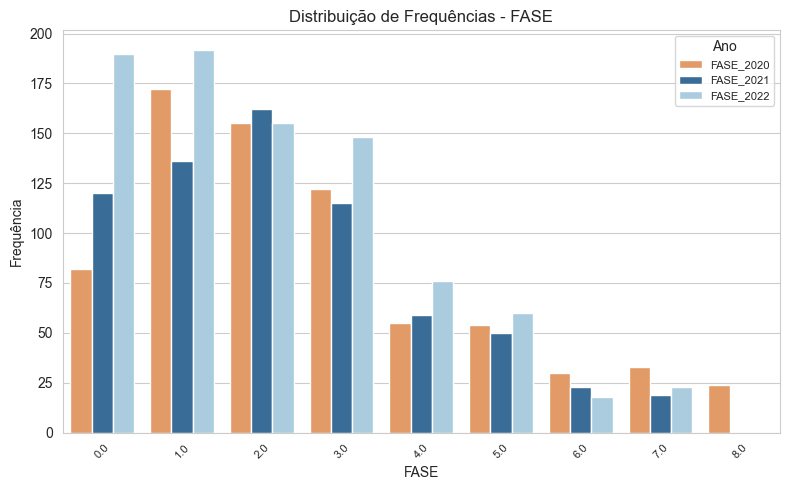

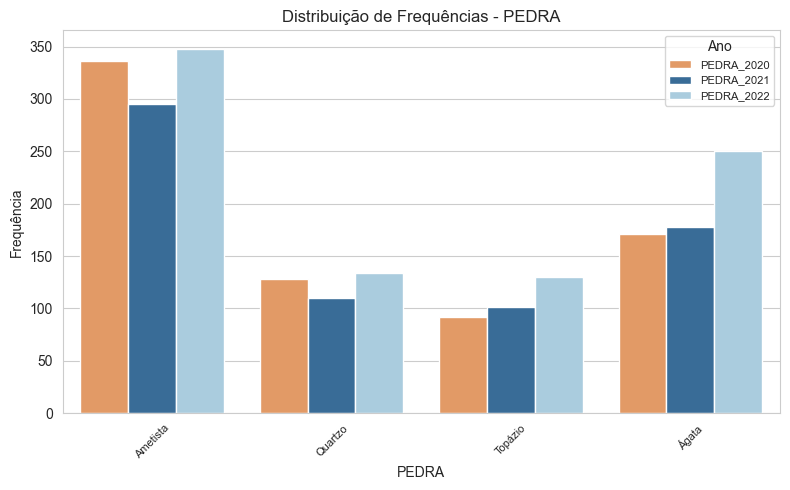

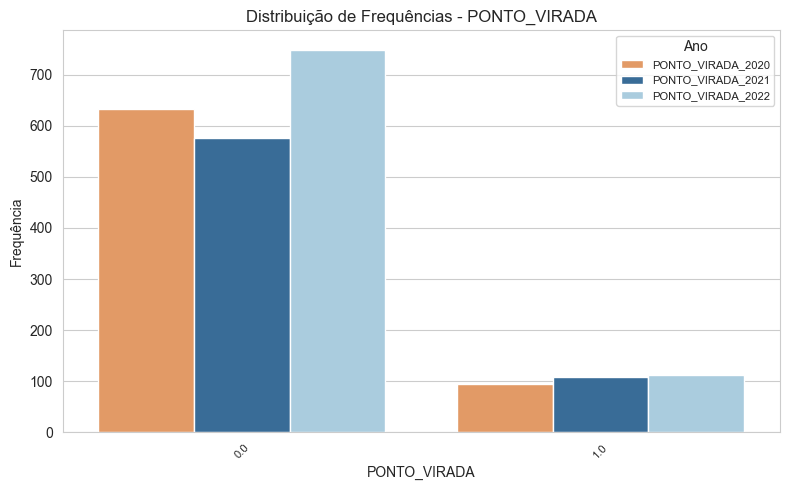

In [380]:
categories = {
    'FASE': ['FASE_2020', 'FASE_2021', 'FASE_2022'],
    'PEDRA': ['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022'],
    'PONTO_VIRADA': ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']#,
    #'STATUS_ALUNO': ['STATUS_ALUNO']
}

custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6'] 

for category, col_group in categories.items():
    if all(col in df_clean.columns for col in col_group):
        melted_data = pd.melt(
                        df_clean[col_group], 
                            var_name='Ano', 
                            value_name=category  
                        )

        plt.figure(figsize=(8, 5))
        sns.countplot(
            data=melted_data, 
            x=category,  
            hue='Ano', 
            palette=custom_palette
        )
        plt.title(f"Distribui√ß√£o de Frequ√™ncias - {category}", fontsize=12)
        plt.xlabel(category, fontsize=10) 
        plt.ylabel("Frequ√™ncia", fontsize=10)
        plt.xticks(rotation=45, fontsize=8)
        plt.legend(title="Ano", fontsize=8)
        plt.tight_layout()
        plt.show()



1. Distribui√ß√£o de Frequ√™ncias para FASE

* Aumento na fase inicial (0): A porcentagem de indiv√≠duos na fase inicial cresceu de 11.28% em 2020 para 22.04% em 2022, indicando um influxo significativo de novos participantes nos √∫ltimos anos.
* Redistribui√ß√£o em fases intermedi√°rias: As fases intermedi√°rias (1 a 5) mostram estabilidade relativa, com varia√ß√µes moderadas. No entanto, a fase 2 diminuiu de 23.68% em 2021 para 17.98% em 2022, sugerindo uma poss√≠vel dificuldade em avan√ßar a partir dessa etapa.
* Redu√ß√£o em fases avan√ßadas (6 e superiores): Observa-se uma tend√™ncia decrescente nas fases finais. A fase 8 praticamente desaparece em 2021 e 2022, o que pode indicar que  estes alunos ingressaram nos cursos superiores.

A alta concentra√ß√£o inicial em 2022 e a redu√ß√£o nas fases avan√ßadas apontam para uma necessidade de estrat√©gias para aumentar a progress√£o e reten√ß√£o em n√≠veis mais elevados.

2. Distribui√ß√£o de Frequ√™ncias para PEDRA

* Predomin√¢ncia de "Ametista": Essa categoria mant√©m a lideran√ßa ao longo dos anos, embora tenha reduzido sua propor√ß√£o de 46.22% em 2020 para 40.37% em 2022.
* Crescimento de "√Ågata": A participa√ß√£o dessa categoria aumentou significativamente de 23.52% em 2020 para 29.00% em 2022, indicando uma mudan√ßa de prefer√™ncia ou uma transi√ß√£o demogr√°fica no grupo.
* Estabilidade em "Quartzo" e "Top√°zio": As categorias mant√™m percentuais relativamente constantes, com leves ajustes anuais.

3. Distribui√ß√£o de Frequ√™ncias para PONTO_VIRADA

* Predomin√¢ncia do valor 0 (n√£o atingiram o ponto de virada): A maior parte dos indiv√≠duos n√£o conseguiu avan√ßar para os pr√≥ximos passos, com a porcentagem de participantes que n√£o atingiram o ponto de virada variando de 87.07% em 2020 para 86.89% em 2022.

* Leve aumento do valor 1 (atingiram o ponto de virada) em 2021: A porcentagem de indiv√≠duos que conseguiram avan√ßar para os pr√≥ximos passos aumentou ligeiramente em 2021, alcan√ßando 15.79%. Esse aumento pode ser reflexo de mudan√ßas no ambiente ou na din√¢mica dos participantes, como impactos externos, incluindo a pandemia de COVID-19.

Embora a maioria dos indiv√≠duos n√£o tenha avan√ßado para os pr√≥ximos passos, o aumento observado em 2021 sugere que √© importante monitorar fatores externos e suas influ√™ncias no progresso dos alunos.

4. Distribui√ß√£o de Frequ√™ncias para STATUS_ALUNO
* Alta taxa de desist√™ncia: Quase metade dos alunos (46.07%) desiste do programa, sendo um indicador cr√≠tico para avalia√ß√£o. Entre os que desistem, 19.21% o fazem em 2021 e 10.46% em 2022.
* Baixa taxa de retorno: Apenas 0.96% dos alunos retornam ao programa em 2022, indicando dificuldades de reintegra√ß√£o.

* Propor√ß√£o de ativos: Apenas 23.29% permanecem ativos, refor√ßando a necessidade de interven√ß√µes para melhorar a reten√ß√£o.

A alta taxa de desist√™ncia e o baixo retorno ao programa s√£o sinais de alerta, sugerindo a necessidade de estrat√©gias para engajamento, suporte e acompanhamento dos alunos.

* **Alunos que Desistiram**

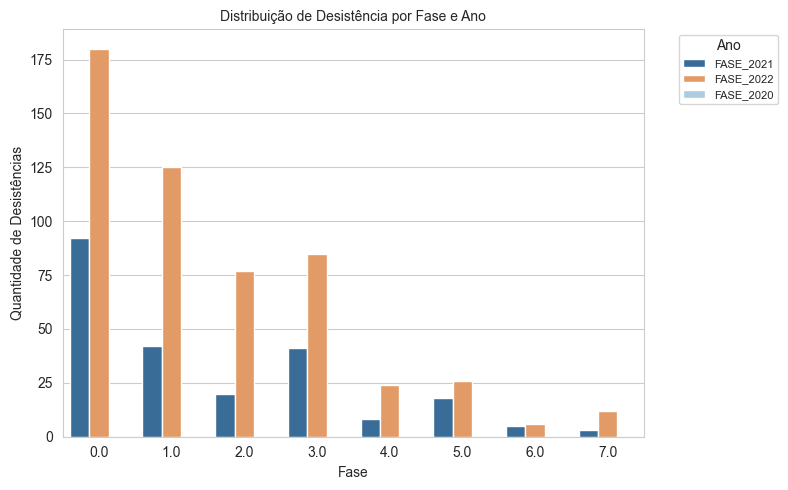

In [381]:
df_desistentes = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia']
df_desistentes['Ultima_Fase'] = df_desistentes[categories['FASE']].idxmax(axis=1).str.replace('FASE_', '').astype(int)

plt.figure(figsize=(8, 5))
sns.countplot(
    data=df_desistentes.melt(id_vars=['STATUS_ALUNO'], value_vars=categories['FASE']),
    x='value', hue='variable', palette=['#2A6DA6', '#F79651', '#A2CFE6']
)
plt.title('Distribui√ß√£o de Desist√™ncia por Fase e Ano', fontsize=10)
plt.ylabel('Quantidade de Desist√™ncias', fontsize=10)
plt.xlabel('Fase', fontsize=10)
plt.xticks(rotation=0)
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.tight_layout()
plt.show()

1. Aumento progressivo das desist√™ncias ao longo dos anos: H√° uma tend√™ncia clara de aumento nas desist√™ncias conforme o tempo passa, com picos significativos em 2022. Isso sugere que fatores externos, como a pandemia de COVID-19 ou outras mudan√ßas no contexto educacional, podem ter influenciado negativamente o progresso dos alunos.

2. Fases mais cr√≠ticas: As fases iniciais e intermedi√°rias (Fase 0 a Fase 3) parecem ser os pontos de maior risco para desist√™ncia, com aumento consider√°vel ao longo dos anos. Isso pode indicar a necessidade de interven√ß√µes mais eficazes nessas fases, oferecendo apoio extra aos alunos para que n√£o desistam antes de avan√ßarem.

3. Alunos mais avan√ßados (Fase 4 a Fase 7): Apesar de uma quantidade menor de desist√™ncias nessas fases, ainda h√° uma preocupa√ß√£o, j√° que o aumento nas desist√™ncias de 2021 para 2022 pode ser reflexo de desafios acumulados ao longo do percurso acad√™mico.


### *Explorando as vari√°veis quantitativas*

* **An√°lise Descritiva:**

In [382]:
quantitative_columns_total = [
    'ANO_INGRESSO',  
    'IAN_2020', 'IAN_2021','IAN_2022', 'IDA_2020','IDA_2021','IDA_2022', 
    'IEG_2020','IEG_2021', 'IEG_2022', 'IAA_2020','IAA_2021', 'IAA_2022',
    'IPS_2020','IPS_2021','IPS_2022', 'IPP_2020','IPP_2021', 'IPP_2022', 
    'IPV_2020','IPV_2021','IPV_2022', 'INDE_2020', 'INDE_2021', 'INDE_2022'
]

In [383]:
display(df_clean[quantitative_columns_total].describe().T)

count         mean       std          min          25%  \
ANO_INGRESSO  1344.0  2019.939732  1.785212  2016.000000  2019.000000   
IAN_2020       727.0     7.431224  2.556944     2.500000     5.000000   
IAN_2021       684.0     6.900585  2.484723     2.500000     5.000000   
IAN_2022       862.0     6.421114  2.387816     2.500000     5.000000   
IDA_2020       727.0     6.322260  2.960073     0.000000     4.666667   
IDA_2021       684.0     5.430556  2.142955     0.000000     4.100000   
IDA_2022       862.0     6.070688  2.059346     0.000000     4.750000   
IEG_2020       727.0     7.681155  2.382122     0.000000     6.600000   
IEG_2021       684.0     6.842544  2.434306     0.000000     5.300000   
IEG_2022       862.0     7.880728  1.649023     0.000000     6.999971   
IAA_2020       727.0     8.368882  1.727980     0.000000     7.958350   
IAA_2021       684.0     8.155702  2.196459     0.000000     7.900000   
IAA_2022       862.0     8.263065  2.080264     0.000000     7.916672   
IPS_2020       727.0     6.737448  1.374011     2.500000     5.625000   
IPS_2021       684.0     6.848977  1.455856     0.000000     6.900000   
IPS_2022       862.0     6.901102  1.070202     2.500000     6.250000   
IPP_2020       727.0     7.067859  1.988054     0.000000     6.953125   
IPP_2021       684.0     7.598538  0.992297     0.000000     7.300000   
IPP_2022       862.0     6.299364  1.135510     0.000000     5.625000   
IPV_2020       727.0     7.242243  1.775110     0.000000     6.916665   
IPV_2021       684.0     7.429240  1.579237     2.500000     6.600000   
IPV_2022       862.0     7.247953  1.098548     2.500010     6.722220   
INDE_2020      727.0     7.296111  1.199925     3.065002     6.569584   
INDE_2021      684.0     6.888016  1.354180     2.468000     6.066250   
INDE_2022      862.0     7.028338  1.029912     3.031806     6.472561   

                      50%          75%          max  
ANO_INGRESSO  2020.000000  2022.000000  2022.000000  
IAN_2020         5.000000    10.000000    10.000000  
IAN_2021         5.000000    10.000000    10.000000  
IAN_2022         5.000000    10.000000    10.000000  
IDA_2020         7.000000     8.666667    10.000000  
IDA_2021         5.900000     6.925000     9.500000  
IDA_2022         6.333333     7.583333     9.916667  
IEG_2020         8.500000     9.500000    10.000000  
IEG_2021         7.200000     8.800000    10.000000  
IEG_2022         8.312179     9.102970    10.000000  
IAA_2020         8.750010     9.166680    10.000020  
IAA_2021         8.800000     9.500000    10.000000  
IAA_2022         8.750010     9.500020    10.000020  
IPS_2020         7.500000     7.500000    10.000000  
IPS_2021         7.500000     7.500000     8.800000  
IPS_2022         7.500000     7.500000    10.000000  
IPP_2020         7.500000     8.125000    10.000000  
IPP_2021         7.700000     8.100000    10.000000  
IPP_2022         6.250000     7.031250     9.218750  
IPV_2020         7.583335     8.055557    10.000010  
IPV_2021         7.700000     8.600000    10.000000  
IPV_2022         7.333335     7.916665    10.000010  
INDE_2020        7.580834     8.178960     9.712504  
INDE_2021        7.166000     7.892750     9.294000  
INDE_2022        7.193950     7.749605     9.441522

* **Distribui√ß√£o de Dados:**

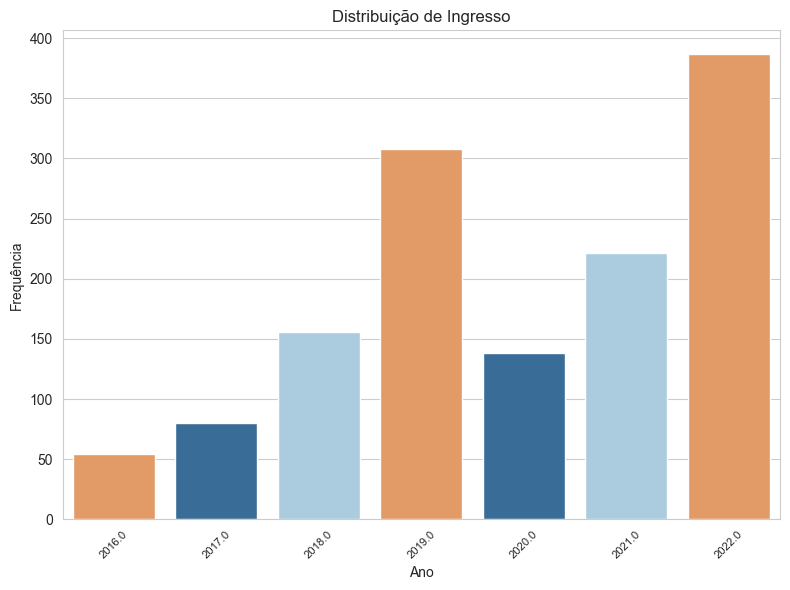

In [384]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_clean, x='ANO_INGRESSO', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
plt.title(f'Distribui√ß√£o de Ingresso', fontsize=12)
plt.ylabel('Frequ√™ncia', fontsize=10)
plt.xlabel('Ano', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.tight_layout()
plt.show()

* Ano de Ingresso (ANO_INGRESSO):O ano m√©dio de ingresso √© 2019, o que √© esperado, considerando que os dados s√£o relativos a tr√™s anos consecutivos. O desvio padr√£o (1.78) indica que a varia√ß√£o dos anos de ingresso n√£o √© muito grande, a maioria dos alunos ingressou em 2019, com poucos ingressando em 2016 e 2022.

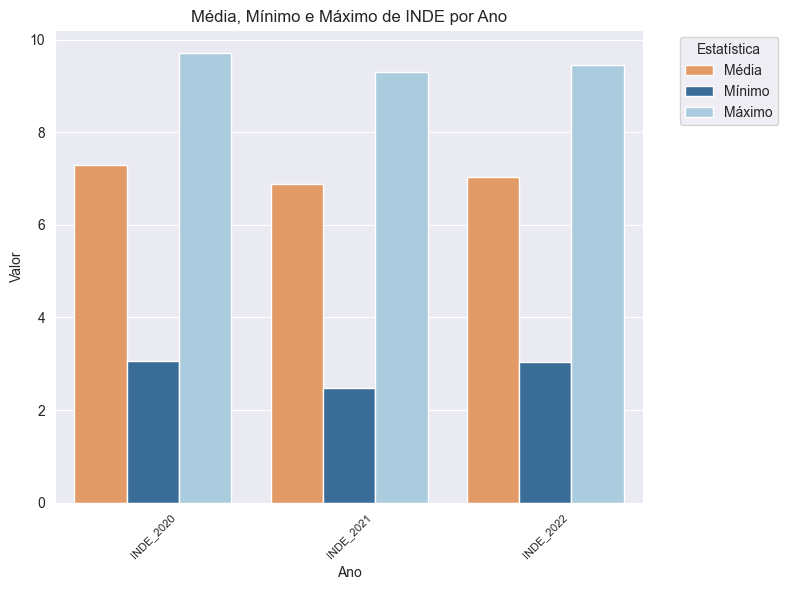

In [385]:
quantitative_ = {
    'INDE': ['INDE_2020', 'INDE_2021', 'INDE_2022']
}

for category, columns in quantitative_.items():
    plt.figure(figsize=(8, 6))
    sns.set_style('darkgrid')
    
    data = df_clean[columns].agg(['mean', 'min', 'max']).T.reset_index()
    data.columns = ['Ano', 'M√©dia', 'M√≠nimo', 'M√°ximo']
    
    data_melted = pd.melt(data, id_vars=["Ano"], value_vars=["M√©dia", "M√≠nimo", "M√°ximo"], 
                          var_name="Estat√≠stica", value_name="Valor")
    
    sns.barplot(data=data_melted, x='Ano', y='Valor', hue='Estat√≠stica', palette=['#F79651', '#2A6DA6', '#A2CFE6'])
    plt.title(f'M√©dia, M√≠nimo e M√°ximo de {category} por Ano', fontsize=12)
    plt.ylabel('Valor', fontsize=10)
    plt.xlabel('Ano', fontsize=10)
    plt.xticks(rotation=45, fontsize=8)
    plt.legend(title='Estat√≠stica', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



* O INDE_2020 apresenta a maior m√©dia (7.30), seguida de uma leve diminui√ß√£o para 6.89 em 2021 e 7.03 em 2022.
* O desvio padr√£o menor ao longo dos anos sugere uma redu√ß√£o na variabilidade entre os alunos em rela√ß√£o √† necessidade de desenvolvimento educacional, indicando que o apoio oferecido foi mais homog√™neo ao longo do tempo.

* **Detec√ß√£o de Outliers**

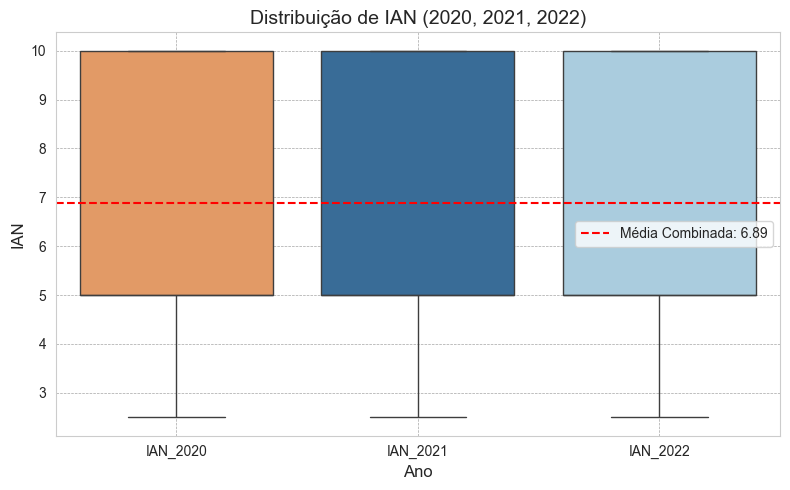

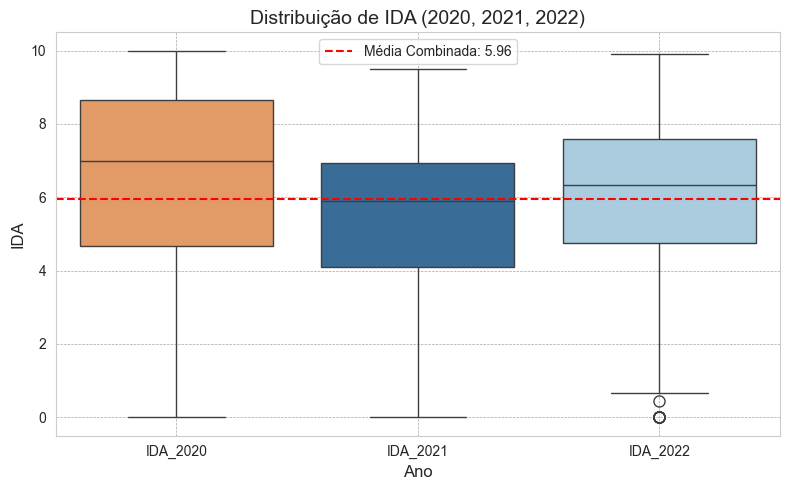

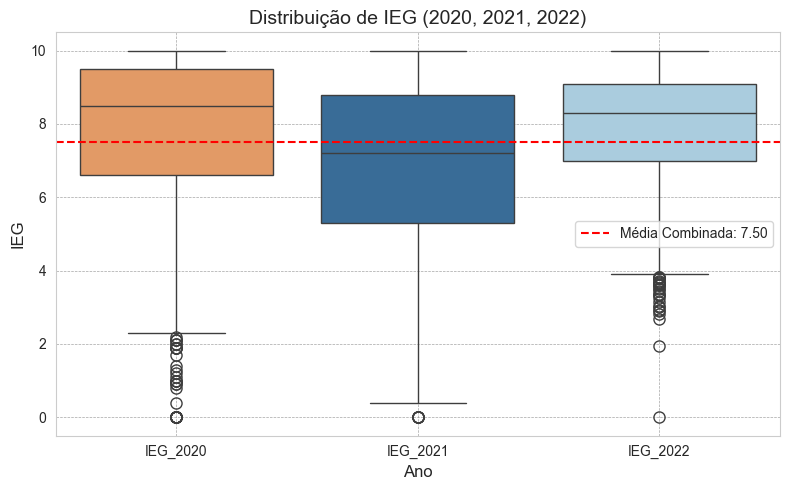

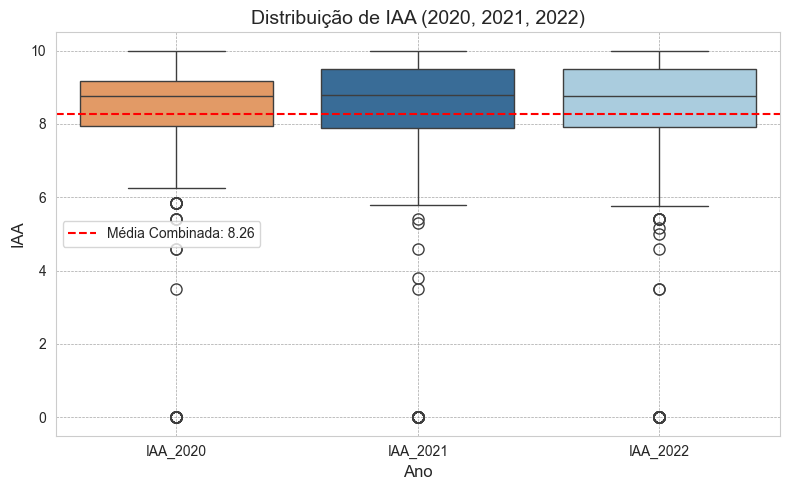

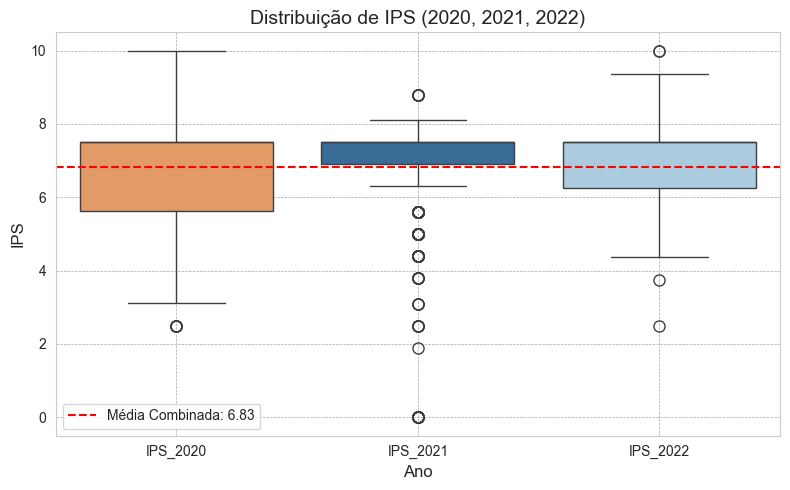

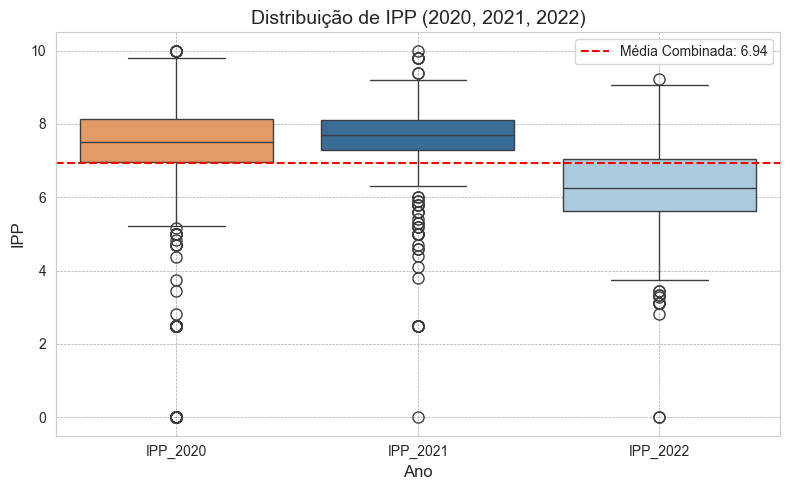

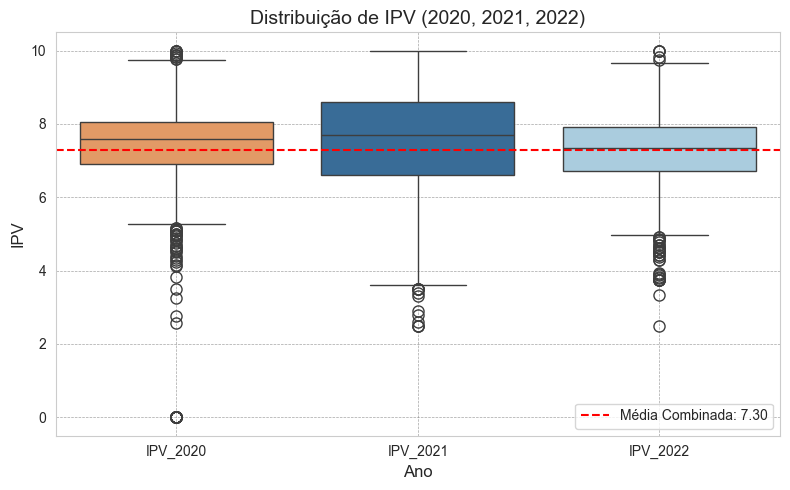

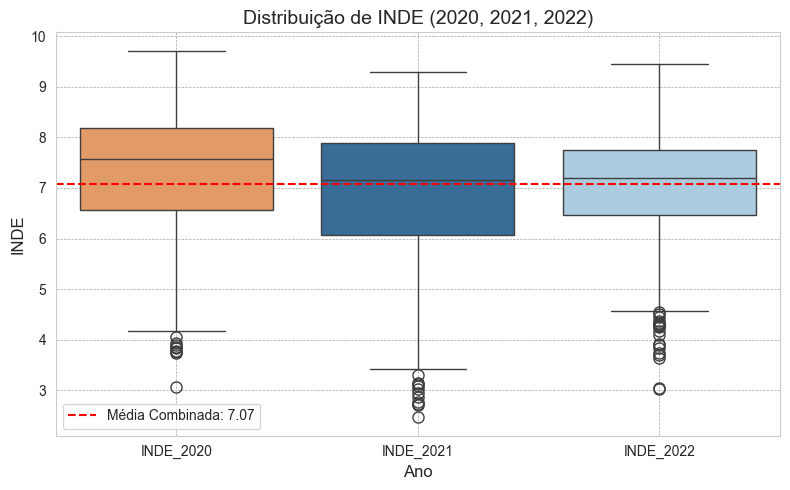

In [386]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]  
    df_plot = df_clean[cols].melt(var_name='Ano', value_name='Valor')
    
    plt.figure(figsize=(8, 5))  
    custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
    sns.set_style('whitegrid')  
    sns.boxplot(x='Ano', y='Valor', data=df_plot, palette=custom_palette, fliersize=8)
    combined_mean = df_plot['Valor'].mean()
    plt.axhline(combined_mean, color='red', linestyle='--', label=f'M√©dia Combinada: {combined_mean:.2f}')
    plt.title(f'Distribui√ß√£o de {col_base} (2020, 2021, 2022)', fontsize=14)
    plt.xlabel('Ano', fontsize=12)
    plt.ylabel(f'{col_base}', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()


* IEG (Engajamento): Muitos alunos apresentaram notas abaixo da m√©dia, indicando desafios de engajamento.
* IAA (Autoavalia√ß√£o): Poucos alunos se autoavaliaram negativamente, sugerindo confian√ßa no pr√≥prio progresso.
* IPS (Psicossocial): O ano de 2021 teve os piores resultados, possivelmente devido √†s dificuldades impostas pela pandemia.
* IPP (Psicopedag√≥gico): Notas baixas predominam em 2020 e 2021, mas houve melhora significativa em 2022.

* **Correla√ß√£o entre Vari√°veis**

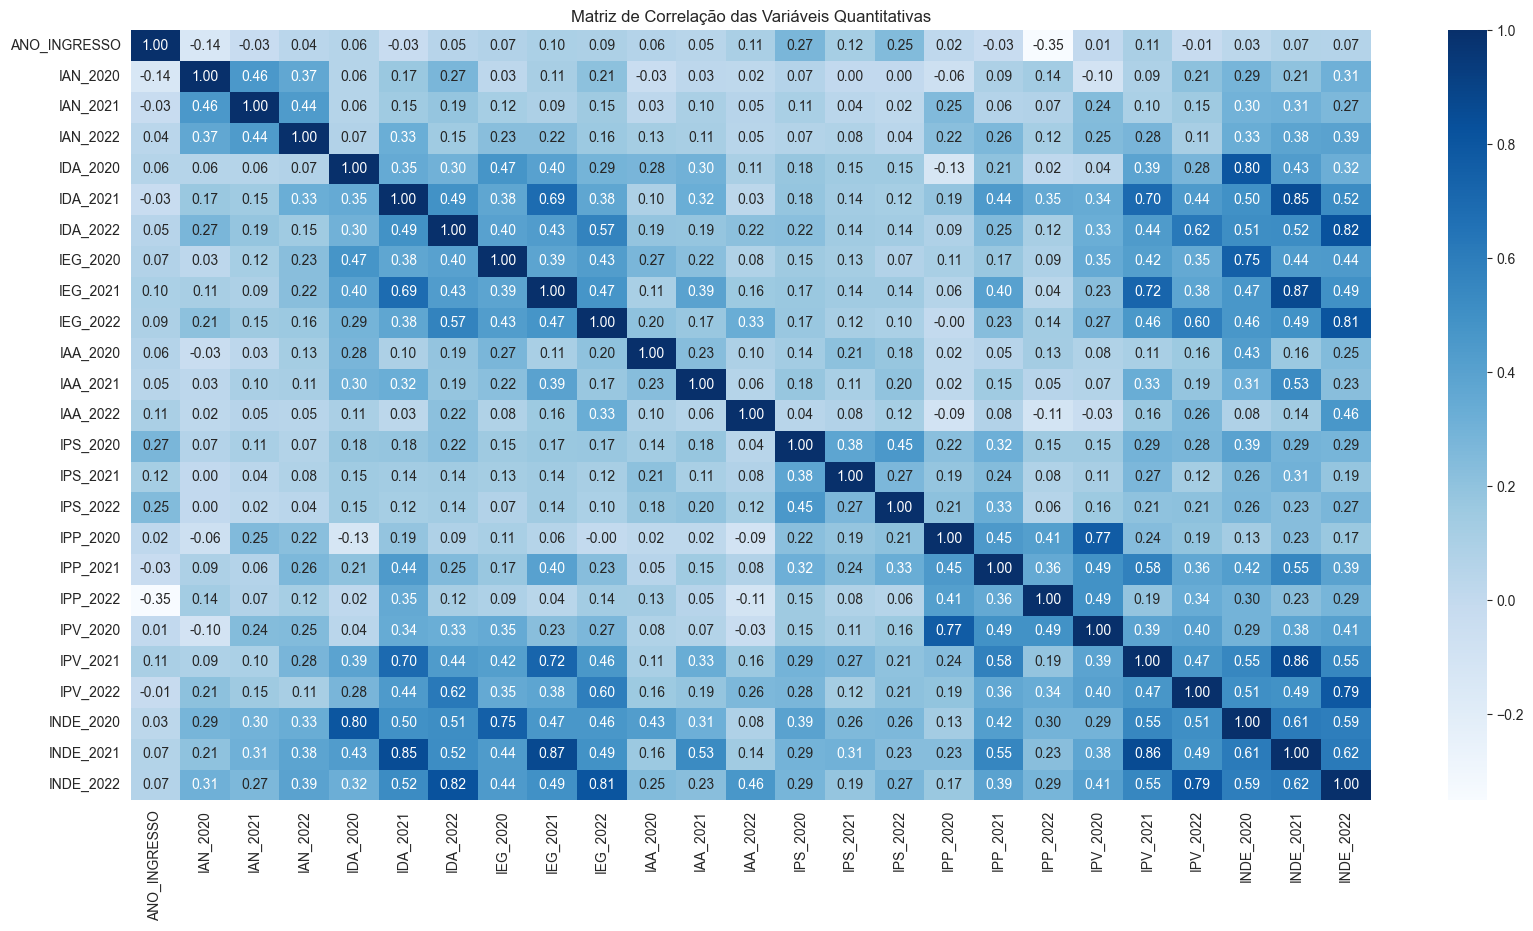

In [387]:
correlation_matrix = df_clean[quantitative_columns_total].corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Matriz de Correla√ß√£o das Vari√°veis Quantitativas')
plt.show()

Maiores correla√ß√µes positivas:
* IDA_2021 e IDA_2022: Correla√ß√£o muito alta, acima de 0.85, sugerindo forte rela√ß√£o entre os anos consecutivos.
* INDE_2021 e INDE_2022: Correla√ß√£o alta, acima de 0.86, indicando consist√™ncia ou padr√£o similar entre essas vari√°veis ao longo dos anos.
* IEG_2021 e IEG_2022: Correla√ß√£o acima de 0.87, tamb√©m indicando alta rela√ß√£o entre os anos consecutivos para essas vari√°veis.

Maiores correla√ß√µes negativas:
* ANO_INGRESSO e IPP_2022: Correla√ß√£o negativa forte em torno de -0.35, sugerindo uma rela√ß√£o inversa entre o ano de ingresso e o desempenho ou m√©trica associada ao IPP em 2022.

* **An√°lise Temporal**

*Tend√™ncias Anuais:*

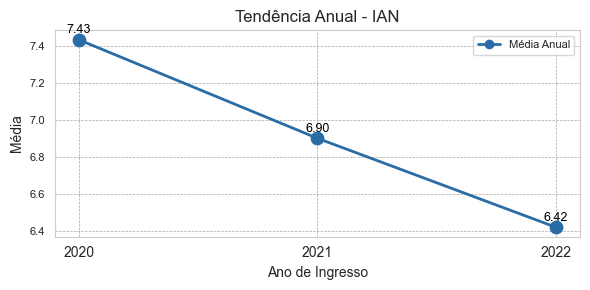

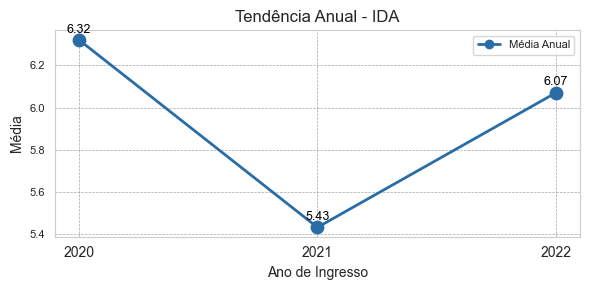

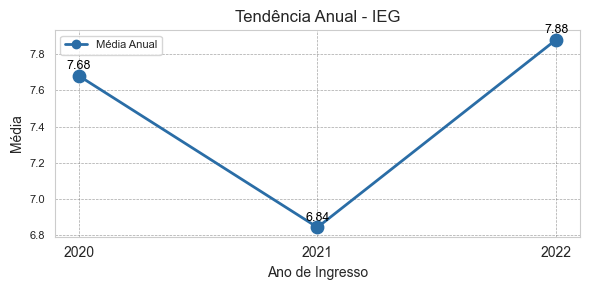

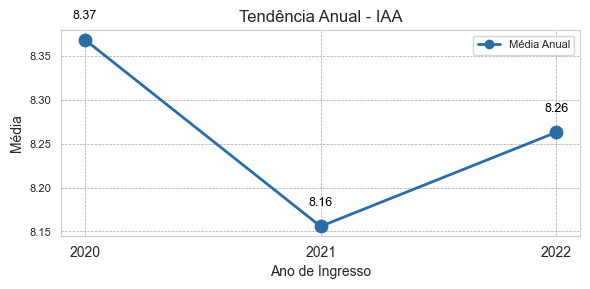

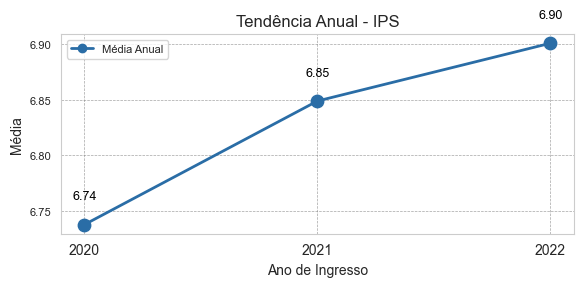

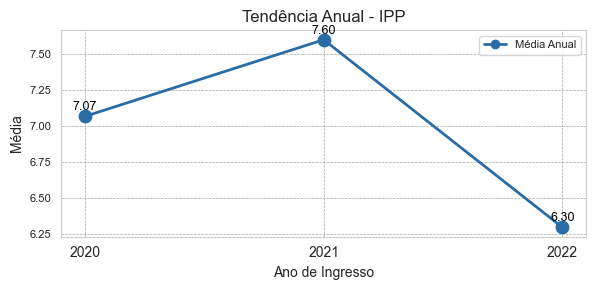

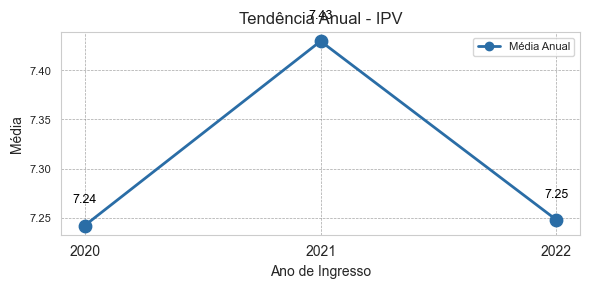

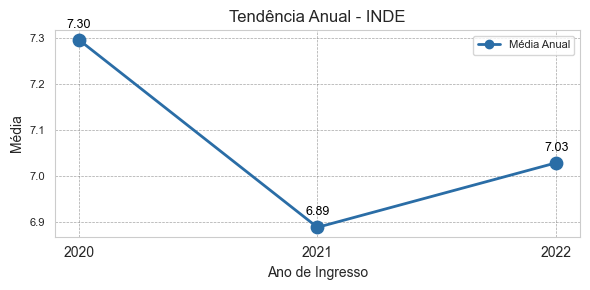

In [388]:
for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    plt.figure(figsize=(6, 3))  
    sns.set_style('whitegrid')  
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]]
    mean_values = df_clean[cols].mean()
    plt.plot(mean_values.index, mean_values.values, marker='o', color='#2A6DA6', linewidth=2, label='M√©dia Anual')

    for year, value in zip(mean_values.index, mean_values.values):
        plt.scatter(year, value, color='#2A6DA6', s=80, zorder=5)
        plt.text(year, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=9, color='black')

    plt.title(f"Tend√™ncia Anual - {col_base}", fontsize=12)
    plt.xlabel('Ano de Ingresso', fontsize=10)
    plt.ylabel("M√©dia", fontsize=10)

    plt.xticks(ticks=mean_values.index, labels=[c.split('_')[-1] for c in mean_values.index], fontsize=10)
    plt.yticks(fontsize=8)

    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=8, loc='best')
    plt.tight_layout()
    plt.show()


1. IAN (√çndice de Avalia√ß√£o de Necessidades): O √≠ndice IAN mostra uma tend√™ncia de queda ao longo dos tr√™s anos analisados, com uma redu√ß√£o de 7,43 em 2020 para 6,42 em 2022. Isso sugere uma diminui√ß√£o nas necessidades dos alunos ao longo do tempo, o que pode indicar uma melhoria nas condi√ß√µes ou nos apoios oferecidos, resultando em menos necessidades de interven√ß√£o.

2. IDA (√çndice de Desempenho Acad√™mico): O desempenho acad√™mico diminui de 2020 (6,32) para 2021 (5,43), o que pode ser um reflexo de desafios enfrentados pelos alunos, como a pandemia de COVID-19. Em 2022, h√° uma leve recupera√ß√£o para 6,07, o que pode indicar um processo de adapta√ß√£o, onde os alunos come√ßam a se recuperar do impacto das circunst√¢ncias anteriores.

3. IEG (√çndice de Engajamento Geral): O engajamento segue uma tend√™ncia interessante: cai de 7,80 em 2020 para 6,84 em 2021, possivelmente devido ao impacto da pandemia e mudan√ßas no formato de ensino. No entanto, h√° uma recupera√ß√£o em 2022 para 7,88, sugerindo que os alunos est√£o voltando a se engajar mais, possivelmente com a retomada das atividades presenciais ou com melhorias nos m√©todos de ensino.

4. IAA (√çndice de Apoio Acad√™mico): O apoio acad√™mico se manteve bastante est√°vel ao longo dos tr√™s anos, com pequenas varia√ß√µes entre 2020 (8,37), 2021 (8,16) e 2022 (8,26). Isso indica que o suporte oferecido aos alunos n√£o foi drasticamente afetado pela pandemia e manteve-se eficaz ao longo do tempo, com uma leve queda apenas.

5. IPS (√çndice de Progresso Social): O progresso social apresentou uma leve melhoria ao longo dos tr√™s anos, com a m√©dia aumentando de 6,74 em 2020 para 6,90 em 2022. Isso pode refletir esfor√ßos para apoiar o desenvolvimento social dos alunos, possivelmente devido a iniciativas para lidar com os efeitos da pandemia e melhorar as condi√ß√µes sociais.

6. IPP (√çndice de Progresso Pessoal): O √≠ndice de progresso pessoal apresenta uma melhoria em 2021 (7,60), mas uma queda significativa em 2022 (6,30). Esse comportamento pode estar relacionado ao impacto prolongado da pandemia, que pode ter afetado o bem-estar emocional e pessoal dos alunos, resultando em dificuldades no desenvolvimento pessoal em 2022.

7. IPV (√çndice de Progresso Vital): O progresso vital mostra uma leve tend√™ncia de melhora em 2021 (7,43), mas com uma queda sutil em 2022 (7,25). Isso pode indicar que os alunos, apesar dos desafios, conseguiram manter uma boa trajet√≥ria em termos de seu progresso vital, embora com uma leve diminui√ß√£o ap√≥s o pico de 2021.

8. INDE (√çndice de Necessidade de Desenvolvimento Educacional): O √≠ndice INDE apresentou uma leve queda de 2020 para 2021, mas em 2022 houve uma leve recupera√ß√£o para 7,03. Isso sugere que, apesar de uma ligeira diminui√ß√£o na necessidade de desenvolvimento educacional em 2021, houve uma leve revers√£o dessa tend√™ncia em 2022, possivelmente devido a melhorias nas condi√ß√µes educacionais.

 
* **Visualiza√ß√£o de Densidade:**

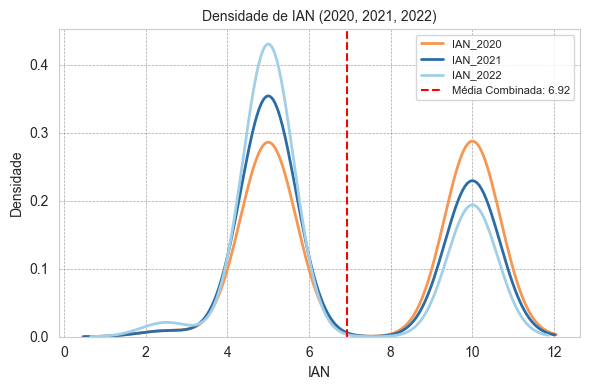

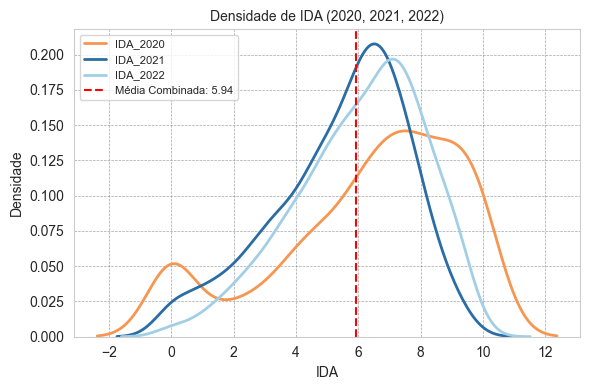

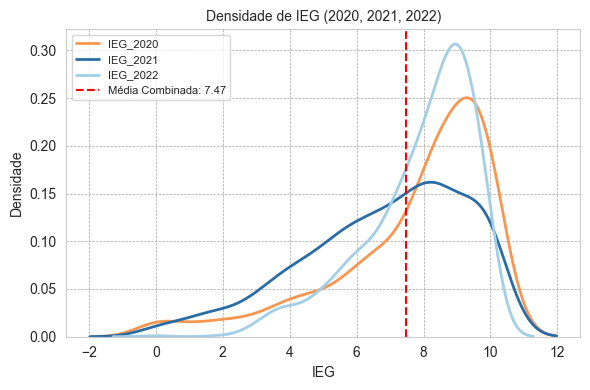

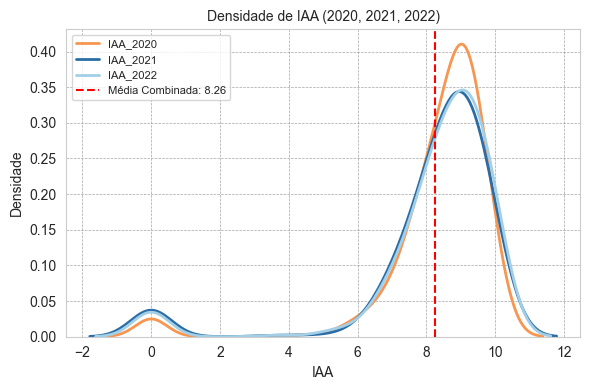

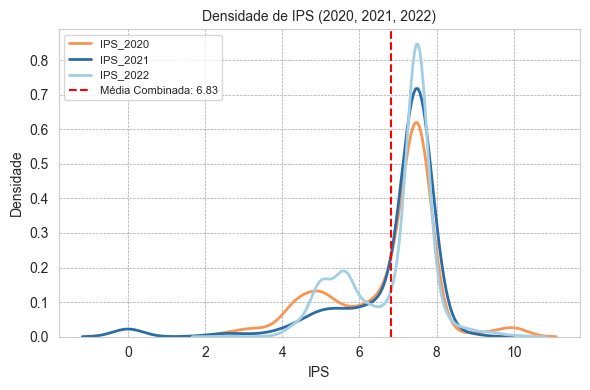

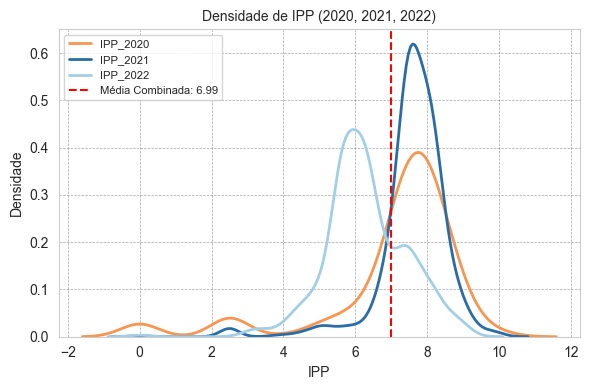

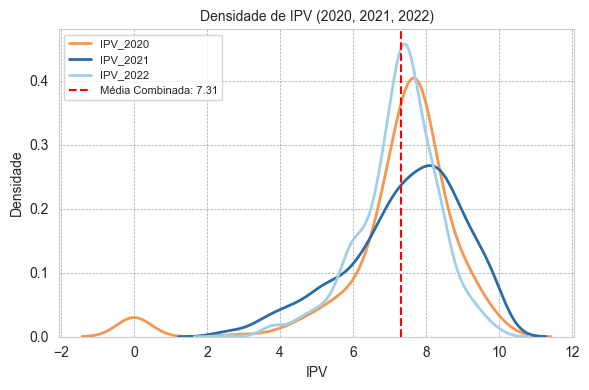

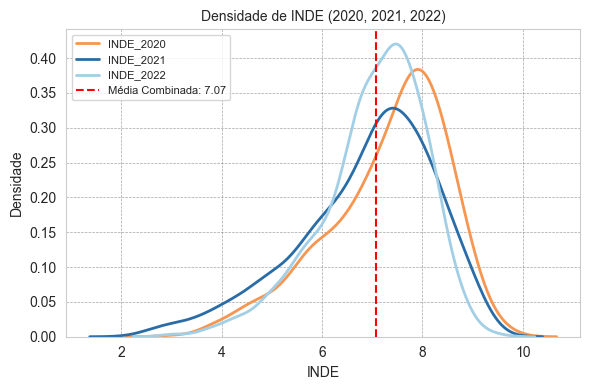

In [389]:

for col_base in ['IAN', 'IDA', 'IEG', 'IAA', 'IPS', 'IPP', 'IPV', 'INDE']:
    cols = [f"{col_base}_{year}" for year in [2020, 2021, 2022]] 
    
    plt.figure(figsize=(6, 4)) 
    sns.set_style('whitegrid')  
    
    mean_values = [] 

    for column, color in zip(cols, ['#F79651', '#2A6DA6', '#A2CFE6']): 
        if column in df_clean.columns:  
            sns.kdeplot(df_clean[column].dropna(), 
                        label=column, 
                        color=color, 
                        linewidth=2)
            mean_value = df_clean[column].mean()
            mean_values.append(mean_value)
    if mean_values: 
        combined_mean = sum(mean_values) / len(mean_values)
        plt.axvline(combined_mean, color='red', linestyle='--', linewidth=1.5, label=f'M√©dia Combinada: {combined_mean:.2f}')

    plt.title(f'Densidade de {col_base} (2020, 2021, 2022)', fontsize=10)
    plt.xlabel(f'{col_base}', fontsize=10)
    plt.ylabel('Densidade', fontsize=10)
    plt.legend(fontsize=8)
    plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

In [390]:
df_clean.columns

Index(['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020',
       'PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021',
       'PONTO_VIRADA_2022', 'IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020',
       'IDA_2021', 'IDA_2022', 'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020',
       'IAA_2021', 'IAA_2022', 'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020',
       'IPP_2021', 'IPP_2022', 'IPV_2020', 'IPV_2021', 'IPV_2022', 'INDE_2020',
       'INDE_2021', 'INDE_2022', 'STATUS_ALUNO', 'ANO_INGRESSO'],
      dtype='object')

1. IAN (√çndice de Aprova√ß√£o de Notas):
As curvas de densidade s√£o sim√©tricas nos tr√™s anos analisados. A maior densidade ocorre em 2022, enquanto a menor densidade √© observada em 2020. Isso indica uma leve melhoria na distribui√ß√£o dos √≠ndices de aprova√ß√£o ao longo dos anos.

2. IDA (√çndice de Desempenho Acad√™mico): As curvas apresentam uma assimetria, inclinadas para o lado, sugerindo a presen√ßa de outliers. A maior densidade ocorre nos anos de 2021 e 2022, com a maior concentra√ß√£o de dados, enquanto o ano de 2020 apresenta uma distribui√ß√£o mais dispersa.

3. IEG (√çndice de Engajamento Geral): As curvas de densidade s√£o sim√©tricas nos anos de 2022 e 2020, enquanto em 2021, h√° uma assimetria inclinada para a esquerda. Os anos de 2022 e 2020 mostram uma maior concentra√ß√£o de dados pr√≥ximos √† m√©dia, enquanto 2021 apresenta uma dispers√£o maior, indicando varia√ß√£o no engajamento.

4. IAA (√çndice de Atividade Acad√™mica): As curvas de densidade de 2020, 2021 e 2022 quase se sobrep√µem. Isso sugere que os valores das vari√°veis em cada um desses anos s√£o semelhantes, sem grandes varia√ß√µes entre eles.

5. IPS (√çndice de Participa√ß√£o Social): Para os valores abaixo da m√©dia combinada, as curvas s√£o assim√©tricas, enquanto para os valores acima da m√©dia, as curvas se tornam sim√©tricas. Essa diferen√ßa na distribui√ß√£o pode indicar uma maior dispers√£o de dados em torno da m√©dia, mas uma tend√™ncia de normalidade para valores elevados.
6. IPP (√çndice de Participa√ß√£o em Projetos): Em 2022, a curva est√° abaixo da m√©dia combinada, enquanto em 2021 e 2020 as curvas s√£o sim√©tricas, com varia√ß√£o na densidade. A dispers√£o dos dados parece ser maior em 2022, com uma menor concentra√ß√£o de √≠ndices perto da m√©dia.

7. IPV (√çndice de Participa√ß√£o Volunt√°ria): As curvas de densidade s√£o sim√©tricas nos anos de 2022 e 2020, com o pico na m√©dia combinada, enquanto em 2021, a curva √© assim√©trica, inclinada para o lado. O ano de 2021 apresenta uma maior dispers√£o, enquanto 2022 e 2020 t√™m maior concentra√ß√£o de dados pr√≥ximos √† m√©dia.

8. INDE (√çndice de Desenvolvimento Educacional): As curvas de densidade s√£o ligeiramente sim√©tricas, com o pico pr√≥ximo √† m√©dia combinada.
Isso sugere que os dados est√£o relativamente equilibrados e pr√≥ximos da m√©dia, sem grandes flutua√ß√µes.

## Quest√µes:
 

In [391]:
'''
Conectar as Vari√°veis Qualitativas e Quantitativas: Use vari√°veis como FASE_2020, FASE_2021, FASE_2022, e STATUS_ALUNO para criar 
trajet√≥rias de progresso por aluno. Exemplo: 
"X% dos alunos que iniciaram na fase 0 em 2020 avan√ßaram at√© a fase 3 em 2022".
'''

'\nConectar as Vari√°veis Qualitativas e Quantitativas: Use vari√°veis como FASE_2020, FASE_2021, FASE_2022, e STATUS_ALUNO para criar \ntrajet√≥rias de progresso por aluno. Exemplo: \n"X% dos alunos que iniciaram na fase 0 em 2020 avan√ßaram at√© a fase 3 em 2022".\n'

1. Qual fase ocorreu desist√™ncia tendo em base seu √∫ltima fase cursada?

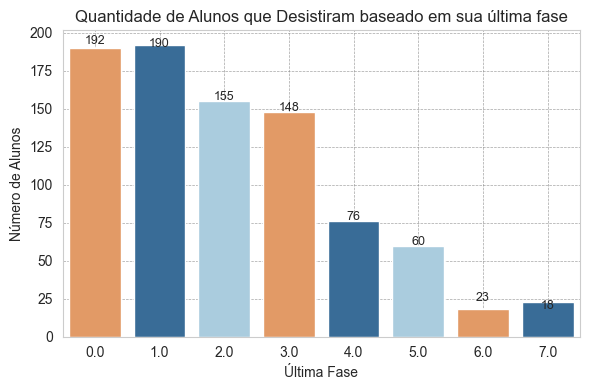

In [392]:
df_clean['FASE_PARADA'] = df_clean[['FASE_2020', 'FASE_2021', 'FASE_2022']].bfill(axis=1).iloc[:, -1]
custom_palette = ['#F79651', '#2A6DA6', '#A2CFE6']
fase_counts = df_clean['FASE_PARADA'].value_counts()

plt.figure(figsize=(6, 4))
sns.set_style('whitegrid')
sns.barplot(x=fase_counts.index, y=fase_counts.values, palette=custom_palette)
plt.title("Quantidade de Alunos que Desistiram baseado em sua √∫ltima fase", fontsize=12)
plt.xlabel("√öltima Fase", fontsize=10)
plt.ylabel("N√∫mero de Alunos", fontsize=10)

# Adiciona r√≥tulos de valores nas barras
for index, value in enumerate(fase_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=9)

plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

*A an√°lise dos dados indica que as desist√™ncias s√£o mais comuns nas fases iniciais do curso, especialmente nas fases 0 e 1, onde a adapta√ß√£o e o comprometimento podem ser maiores desafios para os alunos. √Ä medida que os alunos progridem para as fases mais avan√ßadas, a quantidade de desist√™ncias diminui, sugerindo que aqueles que alcan√ßam essas fases tendem a ser mais resilientes e comprometidos.*

2a. Saber diante das notas gerais em qual classifica√ß√£o est√£o as desistencias.

In [393]:
df_clean['STATUS_ALUNO'].unique()

array(['Desistiu em 2022', 'Desistiu em 2021', 'Ativo', 'Desistencia',
       'Retornou em 2022'], dtype=object)

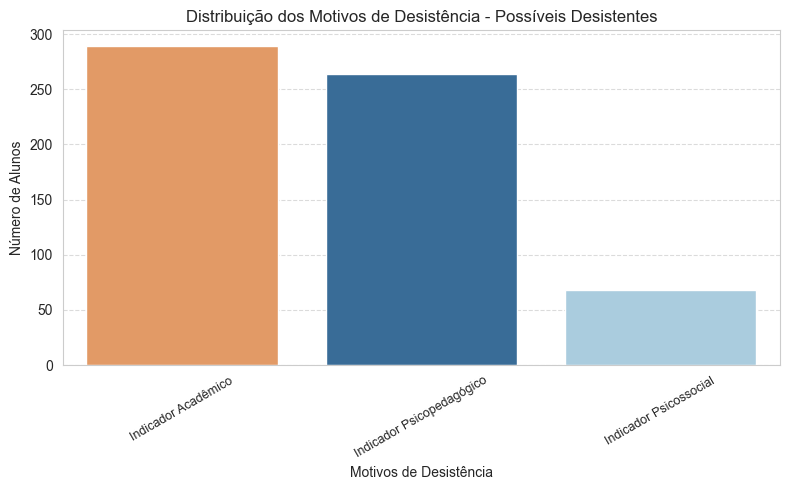

In [394]:
df_clean['dimensao_academica'] = df_clean[['IAN_2020', 'IDA_2020', 'IEG_2020',
                                           'IAN_2021', 'IDA_2021', 'IEG_2021',
                                           'IAN_2022', 'IDA_2022', 'IEG_2022']].mean(axis=1)

df_clean['dimensao_psicossocial'] = df_clean[['IAA_2020', 'IPS_2020',
                                              'IAA_2021', 'IPS_2021',
                                              'IAA_2022', 'IPS_2022']].mean(axis=1)

df_clean['dimensao_psicopedagogica'] = df_clean[['IPP_2020', 'IPV_2020',
                                                 'IPP_2021', 'IPV_2021',
                                                 'IPP_2022', 'IPV_2022']].mean(axis=1)

# Filtrando alunos com poss√≠vel desist√™ncia
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia']

# Identificando o menor indicador como motivo de desist√™ncia
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia[
    ['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']
].idxmin(axis=1)

# Tradu√ß√£o dos motivos
traducao_dimensoes = {
    'dimensao_academica': 'Indicador Acad√™mico',
    'dimensao_psicossocial': 'Indicador Psicossocial',
    'dimensao_psicopedagogica': 'Indicador Psicopedag√≥gico'
}
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_dimensoes)

# Contando os motivos de desist√™ncia
motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

# Criando o gr√°fico de barras
plt.figure(figsize=(8, 5))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribui√ß√£o dos Motivos de Desist√™ncia - Poss√≠veis Desistentes", fontsize=12)
plt.xlabel("Motivos de Desist√™ncia", fontsize=10)
plt.ylabel("N√∫mero de Alunos", fontsize=10)
plt.xticks(rotation=30, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A an√°lise dos motivos de desist√™ncia revela que a dimens√£o acad√™mica √© o principal fator relacionado √†s desist√™ncias, com uma quantidade consider√°vel de alunos indicando dificuldades nesse aspecto. A dimens√£o psicossocial, embora ainda relevante, apresenta um impacto um pouco menor. Por fim, a dimens√£o psicopedag√≥gica tamb√©m se destaca, mas em uma propor√ß√£o semelhante √† acad√™mica, indicando que as quest√µes relacionadas ao aprendizado e ao apoio pedag√≥gico t√™m um papel importante nas desist√™ncias.

Essa distribui√ß√£o sugere que estrat√©gias focadas no fortalecimento acad√™mico e no suporte psicopedag√≥gico poderiam ser eficazes para reduzir as desist√™ncias entre os alunos.

2b. Justificativa de desist√™ncia: √çndices menores

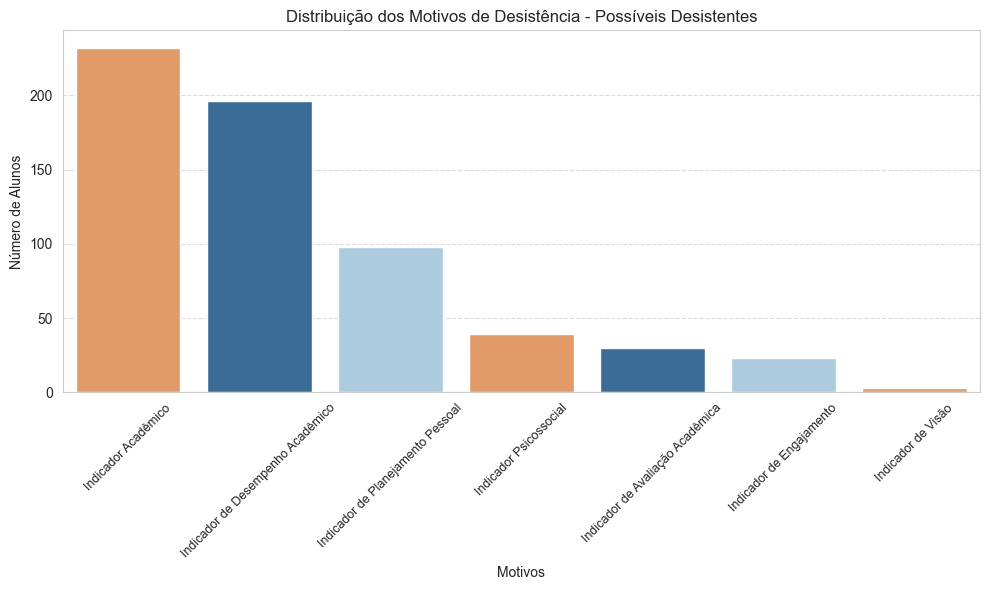

In [395]:
colunas_abordadas = [
    'IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022',
    'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
    'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022',
    'IPV_2020', 'IPV_2021', 'IPV_2022'
]

df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia'][colunas_abordadas]
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia.idxmin(axis=1)
traducao_motivos = {
    'IAN': 'Indicador Acad√™mico',
    'IDA': 'Indicador de Desempenho Acad√™mico',
    'IEG': 'Indicador de Engajamento',
    'IAA': 'Indicador de Avalia√ß√£o Acad√™mica',
    'IPS': 'Indicador Psicossocial',
    'IPP': 'Indicador de Planejamento Pessoal',
    'IPV': 'Indicador de Vis√£o'
}

df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].str.extract(r'(\w+)_\d+')
df_desistencia['MOTIVO_DESISTENCIA'] = df_desistencia['MOTIVO_DESISTENCIA'].map(traducao_motivos)

motivos_counts = df_desistencia['MOTIVO_DESISTENCIA'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=motivos_counts.index, y=motivos_counts.values, palette=custom_palette)
plt.title("Distribui√ß√£o dos Motivos de Desist√™ncia - Poss√≠veis Desistentes", fontsize=12)
plt.xlabel("Motivos", fontsize=10)
plt.ylabel("N√∫mero de Alunos", fontsize=10)
plt.xticks(rotation=45, fontsize=9)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()




3. Tempo de Perman√™ncia para alunos com "Poss√≠vel desist√™ncia

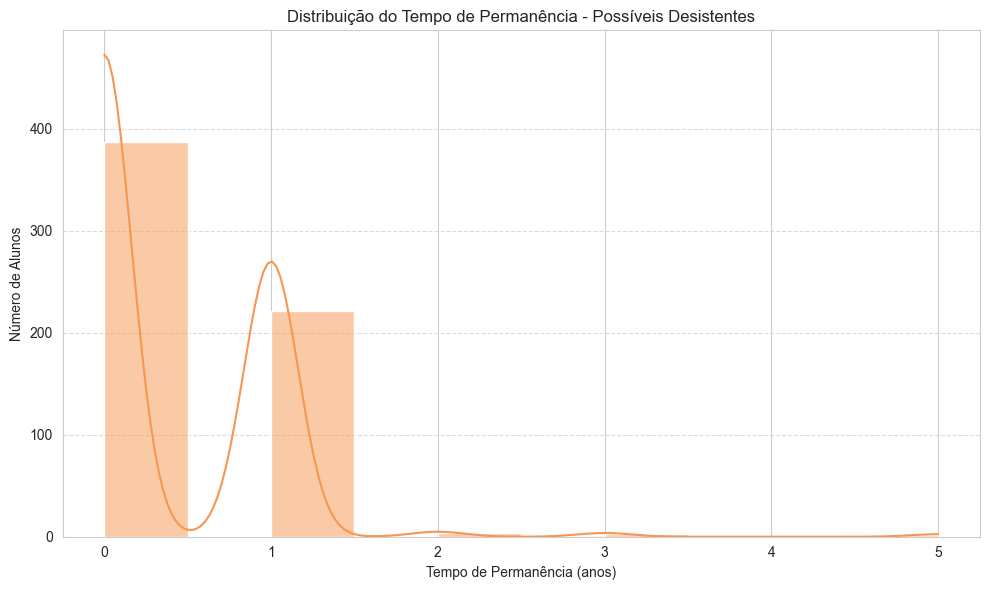

M√©dia de tempo de perman√™ncia dos alunos classificados como 'Desistencia': 0.40 anos


In [396]:
df_desistencia = df_clean[df_clean['STATUS_ALUNO'] == 'Desistencia'].copy()

# Calcula o tempo de perman√™ncia com base no ano de ingresso
if 'ANO_INGRESSO' in df_desistencia.columns:
    # Usa 2022 como o √∫ltimo ano de refer√™ncia
    df_desistencia['TEMPO_PERMANENCIA'] = 2022 - df_desistencia['ANO_INGRESSO']
else:
    raise KeyError("A coluna 'ANO_INGRESSO' n√£o est√° presente no dataframe.")

# Gr√°fico de distribui√ß√£o do tempo de perman√™ncia
plt.figure(figsize=(10, 6))
sns.histplot(df_desistencia['TEMPO_PERMANENCIA'], kde=True, color='#F79651', bins=10)
plt.title("Distribui√ß√£o do Tempo de Perman√™ncia - Poss√≠veis Desistentes", fontsize=12)
plt.xlabel("Tempo de Perman√™ncia (anos)", fontsize=10)
plt.ylabel("N√∫mero de Alunos", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Calcula e imprime a m√©dia do tempo de perman√™ncia
media_tempo = df_desistencia['TEMPO_PERMANENCIA'].mean()
print(f"M√©dia de tempo de perman√™ncia dos alunos classificados como 'Desistencia': {media_tempo:.2f} anos")

A an√°lise da distribui√ß√£o do tempo de perman√™ncia entre os alunos que desistiram revela que a grande maioria deixou o curso nas primeiras fases, com destaque para as fases 0 e 1, que acumulam o maior n√∫mero de desist√™ncias. As fases 2, 3, 4 e 5 t√™m um n√∫mero significativamente menor de desist√™ncias, indicando que as desist√™ncias diminuem conforme o aluno avan√ßa nas fases. As fases 6 e 7 n√£o aparecem, o que pode sugerir que os alunos que chegam a essas fases s√£o mais resilientes ou encontram mais apoio.

Al√©m disso, a m√©dia de tempo de perman√™ncia dos alunos que desistiram √© de apenas 0.40 anos, o que refor√ßa a ideia de que muitas desist√™ncias acontecem logo no in√≠cio do curso, possivelmente devido a dificuldades acad√™micas, psicossociais ou psicopedag√≥gicas. Isso indica a import√¢ncia de um acompanhamento mais pr√≥ximo nos primeiros anos, para identificar e mitigar os fatores que levam √† desist√™ncia.

4. Tempo de perman√™ncia dos alunos na fase 7

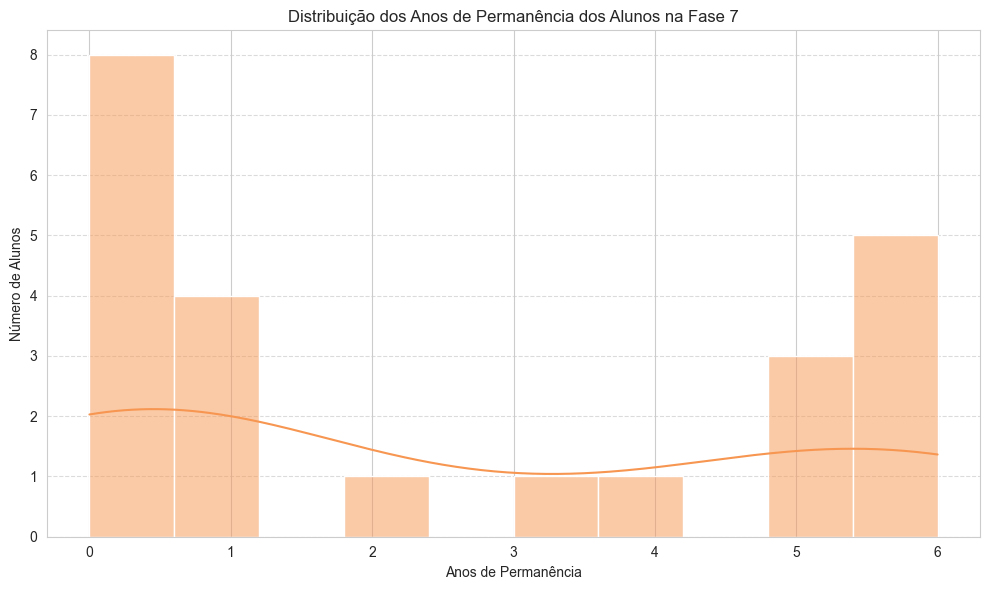

In [397]:
df_fase7 = df_clean[df_clean['FASE_PARADA'] == 7].copy()

# Calcula o ano de perman√™ncia e o tempo de perman√™ncia
if 'ANO_INGRESSO' in df_fase7.columns:
    df_fase7['PERMANENCIA_ANOS'] = 2022 - df_fase7['ANO_INGRESSO']
else:
    raise KeyError("A coluna 'ANO_INGRESSO' n√£o est√° presente no dataframe.")


# Gr√°fico de distribui√ß√£o dos anos de perman√™ncia
plt.figure(figsize=(10, 6))
sns.histplot(df_fase7['PERMANENCIA_ANOS'], kde=True, color='#F79651', bins=10)
plt.title("Distribui√ß√£o dos Anos de Perman√™ncia dos Alunos na Fase 7", fontsize=12)
plt.xlabel("Anos de Perman√™ncia", fontsize=10)
plt.ylabel("N√∫mero de Alunos", fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

A an√°lise da distribui√ß√£o dos anos de perman√™ncia dos alunos na fase 7 revela que a maioria dos alunos que chegaram a essa fase permaneceu por um per√≠odo curto de tempo, com muitos ficando menos de 2 anos no curso. Alguns poucos estudantes ficaram por um per√≠odo de 6 anos, indicando que, embora a fase 7 represente uma fase final, nem todos os alunos t√™m uma trajet√≥ria longa. Al√©m disso, h√° um n√∫mero consider√°vel de alunos que desistiram logo ap√≥s ingressar, com per√≠odos de perman√™ncia muito curtos, como 0 anos, o que sugere que a desist√™ncia pode ocorrer logo ap√≥s a chegada √† fase 7.

O gr√°fico de distribui√ß√£o, juntamente com os dados, sugere que a fase 7 pode ter um padr√£o misto: h√° alunos que permanecem por um tempo significativo, enquanto outros desistem rapidamente, o que pode indicar quest√µes espec√≠ficas de motiva√ß√£o, dificuldades acad√™micas ou outras raz√µes externas que influenciam essa fase.

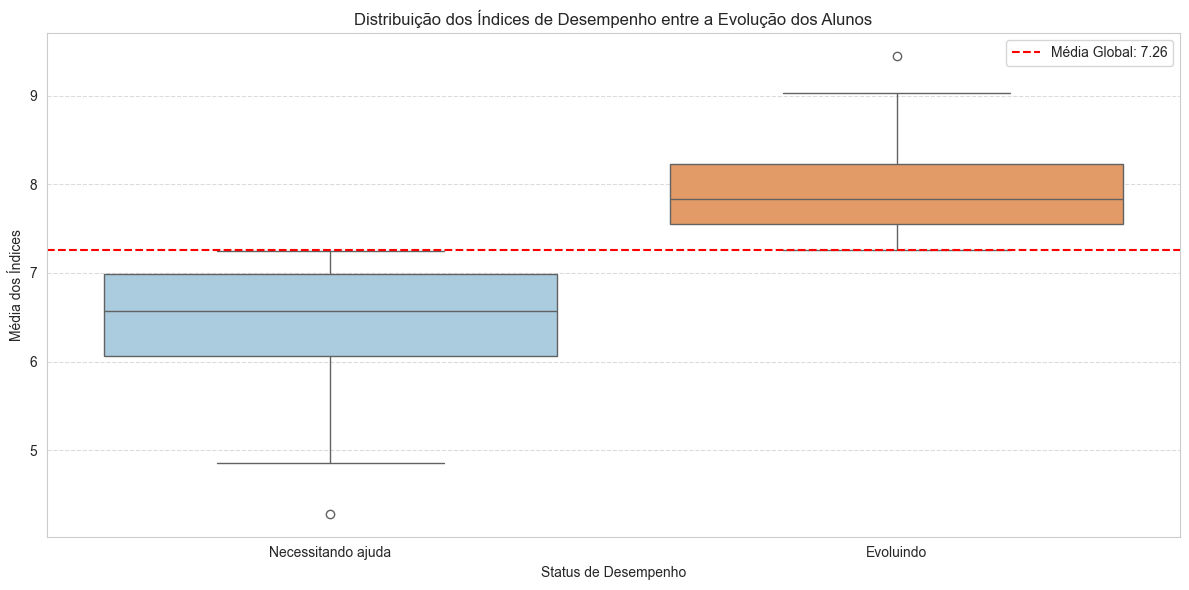

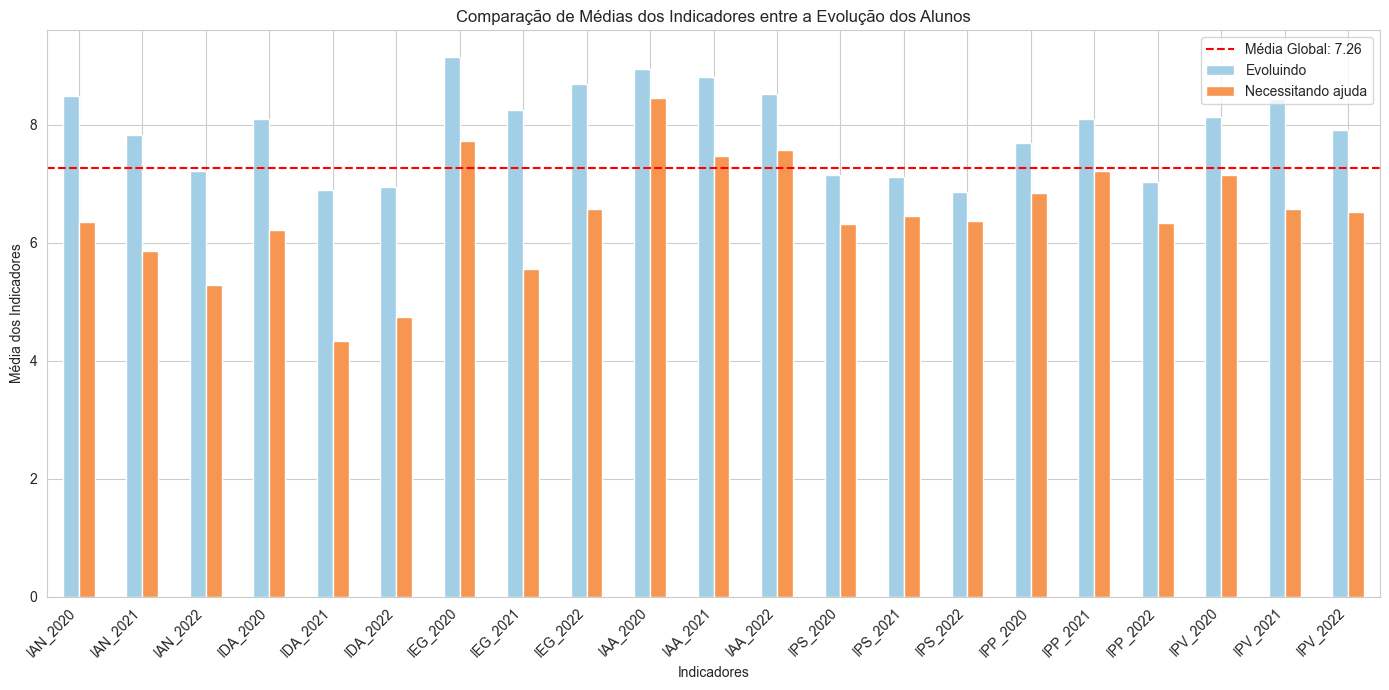

M√©dia global dos √≠ndices: 7.26


In [398]:
df_ativos = df_clean[df_clean['STATUS_ALUNO'] == 'Ativo']
indices = ['IAN_2020', 'IAN_2021', 'IAN_2022', 'IDA_2020', 'IDA_2021', 'IDA_2022', 
           'IEG_2020', 'IEG_2021', 'IEG_2022', 'IAA_2020', 'IAA_2021', 'IAA_2022',
           'IPS_2020', 'IPS_2021', 'IPS_2022', 'IPP_2020', 'IPP_2021', 'IPP_2022', 
           'IPV_2020', 'IPV_2021', 'IPV_2022']

df_ativos['MEDIA_INDICES'] = df_ativos[indices].mean(axis=1)

media_global = df_ativos[indices].stack().mean()
limite_bem = media_global

df_ativos['STATUS_DESEMPENHO'] = ['Evoluindo' if x > limite_bem else 'Necessitando ajuda' for x in df_ativos['MEDIA_INDICES']]
df_comparacao = df_ativos.groupby('STATUS_DESEMPENHO')[indices].mean()

# compara√ß√µes entre os grupos
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_ativos, x='STATUS_DESEMPENHO', y='MEDIA_INDICES', palette=['#A2CFE6', '#F79651'])
plt.title('Distribui√ß√£o dos √çndices de Desempenho entre a Evolu√ß√£o dos Alunos', fontsize=12)
plt.xlabel('Status de Desempenho', fontsize=10)
plt.ylabel('M√©dia dos √çndices', fontsize=10)
plt.axhline(y=media_global, color='red', linestyle='--', label=f'M√©dia Global: {media_global:.2f}')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# ompara√ß√µes entre indicadores
df_comparacao.T.plot(kind='bar', figsize=(14, 7), color=['#A2CFE6', '#F79651'])
plt.title('Compara√ß√£o de M√©dias dos Indicadores entre a Evolu√ß√£o dos Alunos', fontsize=12)
plt.ylabel('M√©dia dos Indicadores', fontsize=10)
plt.xlabel('Indicadores', fontsize=10)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=media_global, color='red', linestyle='--', label=f'M√©dia Global: {media_global:.2f}')
plt.legend()
plt.tight_layout()
plt.show()

print(f"M√©dia global dos √≠ndices: {media_global:.2f}")


A an√°lise desses gr√°ficos revela que os alunos classificados como "Indo Bem" apresentam um desempenho consistentemente superior em v√°rias dimens√µes, enquanto os alunos "N√£o Indo Bem" apresentam um desempenho mais variado e, em muitos casos, inferior √† m√©dia global.
Al√©m disso, pode-se inferir que fatores acad√™micos, psicossociais e psicopedag√≥gicos est√£o fortemente correlacionados ao desempenho geral dos alunos, com aqueles indo bem em uma √°rea tendendo a ir bem nas outras tamb√©m.

Interven√ß√µes focadas nos alunos "N√£o Indo Bem" podem se beneficiar de uma abordagem mais personalizada, considerando suas dificuldades espec√≠ficas, seja no campo acad√™mico ou psicossocial.

## Analise de todos os gr√°ficos e estat√≠sticas

### **Introdu√ß√£o**

Este documento apresenta as an√°lises realizadas sobre o desempenho educacional dos alunos da ONG "Passos M√°gicos" durante os anos de 2020, 2021 e 2022. O objetivo foi compreender os padr√µes de progresso, desist√™ncias, e os fatores que influenciam o aprendizado dos alunos. Os dados analisados incluem diversos indicadores, como desempenho acad√™mico, engajamento, adequa√ß√£o ao n√≠vel e aspectos psicossociais.



### **Resultados da An√°lise**

*Frequ√™ncia de Alunos por Fase*
* 2020: A maior concentra√ß√£o de alunos estava nas fases 1 a 3.
* 2021 e 2022: As fases 0 a 3 apresentaram distribui√ß√µes equilibradas, mas houve uma queda expressiva no n√∫mero de alunos a partir da fase 4. Em todos os anos, a quantidade de alunos reduzia pela metade a cada avan√ßo de fase.

*Distribui√ß√£o das Pedras (Classifica√ß√£o pelo INDE)*

As classifica√ß√µes s√£o baseadas nos seguintes intervalos:
* Quartzo: 2,405 a 5,506
* √Ågata: 5,506 a 6,868
* Ametista: 6,868 a 8,230
* Top√°zio: 8,230 a 9,294

* 2020: Houve um n√∫mero consider√°vel de alunos classificados como Quartzo e Ametista, indicando uma boa distribui√ß√£o entre os extremos.

* 2021 e 2022: A maior parte dos alunos foi classificada como Ametista e Top√°zio, demonstrando um desempenho geral elevado.

*Indicador Ponto de Virada*

Embora muitos alunos apresentassem bom desempenho em suas respectivas fases, a maioria n√£o atingiu o ponto de virada nos tr√™s anos analisados.


*Desist√™ncias: Impactos Temporais e Perfil Acad√™mico*

* An√°lise Temporal:
    * O ano de 2021 apresentou o maior √≠ndice de desist√™ncias, um fen√¥meno amplamente associado aos impactos da pandemia de COVID-19.

* Perfil das Desist√™ncias:
    * A maioria das desist√™ncias ocorreu entre estudantes nas fases iniciais do curso (fases 0 a 3), evidenciando maior vulnerabilidade nesse est√°gio acad√™mico. Por outro lado, os √≠ndices de desist√™ncias nas fases mais avan√ßadas foram significativamente menores.

* Classifica√ß√£o dos Alunos:

    * Ativos (314): Estudantes que permaneceram matriculados durante os tr√™s anos analisados (2020, 2021 e 2022).
    * Retornaram em 2022 (13): Alunos que participaram em 2020, n√£o estiveram presentes em 2021 (classificados como ausentes) e retornaram em 2022.

* Desist√™ncias:
    * Desist√™ncias em 2022: Foram registrados 141 casos de desist√™ncias.
    * Desist√™ncias em anos anteriores: At√© 2021, acumulou-se um total de 880 desist√™ncias, sendo 259 casos apenas no ano de 2021.
* Destaques da An√°lise:
    * A an√°lise evidencia o impacto temporal das desist√™ncias, destacando as fases iniciais como as mais cr√≠ticas em termos de evas√£o acad√™mica. Al√©m disso, refor√ßa o papel de eventos externos, como a pandemia, no comportamento e engajamento dos estudantes.


*Desempenho Geral (INDE)*

* A an√°lise do INDE mostrou que a maioria dos alunos teve desempenho acima da m√©dia em todos os anos, com um aumento gradual de notas altas entre 2020 e 2022.

*Outliers nos Indicadores*

* IEG (Engajamento): Muitos alunos apresentaram notas abaixo da m√©dia, indicando desafios de engajamento.
* IAA (Autoavalia√ß√£o): Poucos alunos se autoavaliaram negativamente, sugerindo confian√ßa no pr√≥prio progresso.
* IPS (Psicossocial): O ano de 2021 teve os piores resultados, possivelmente devido √†s dificuldades impostas pela pandemia.
* IPP (Psicopedag√≥gico): Notas baixas predominam em 2020 e 2021, mas houve melhora significativa em 2022.

*Correla√ß√£o entre Indicadores*

* Os indicadores de avalia√ß√£o apresentaram alta correla√ß√£o com o INDE, refor√ßando a import√¢ncia desses fatores para o desenvolvimento educacional.

*Tend√™ncia Anual*

* 2020: Maior m√©dia geral de notas.
* 2021: Desempenho mais baixo, refletindo as dificuldades da pandemia.
* 2022: Recupera√ß√£o significativa, com aumento de novos ingressos e melhoria no desempenho geral.

### **Conclus√£o**

As an√°lises revelaram padr√µes importantes no progresso e nos desafios enfrentados pelos alunos da ONG Passos M√°gicos:

* A maioria dos alunos progride bem ao longo dos anos, mas as fases iniciais apresentam maior √≠ndice de desist√™ncia.
* A pandemia impactou negativamente o engajamento, o desempenho psicossocial e o psicopedag√≥gico em 2021.
* Indicadores como IEG e INDE s√£o cruciais para monitorar o desenvolvimento acad√™mico.

### **Especula√ß√£o de Melhorias para a ONG**

* Redu√ß√£o de Desist√™ncias nas Fases Iniciais: Implementar programas de incentivo personalizados para alunos das fases 0 a 3, como mentoria individualizada, apoio financeiro e acompanhamento familiar.

* Engajamento Acad√™mico: Desenvolver atividades interativas e adaptadas √† realidade dos alunos para melhorar o engajamento, especialmente para aqueles com baixos √≠ndices de IEG.

* Apoio Psicossocial: Aumentar o suporte psicol√≥gico para minimizar os efeitos de crises externas, como a pandemia, oferecendo sess√µes de acompanhamento mais frequentes.

* Monitoramento Cont√≠nuo: Implementar um sistema de monitoramento que avalie regularmente o progresso dos alunos e identifique precocemente os riscos de desist√™ncia.

* Integra√ß√£o Familiar: Envolver as fam√≠lias no processo educacional, promovendo workshops e reuni√µes para conscientizar sobre a import√¢ncia da continuidade acad√™mica.

 A an√°lise dos dados entre 2020 e 2022 mostra um quadro de desafios para os alunos, com quedas no desempenho acad√™mico e no engajamento, seguidas por sinais de recupera√ß√£o em 2022. As institui√ß√µes de ensino demonstraram resili√™ncia na manuten√ß√£o do apoio acad√™mico, mas precisam focar em estrat√©gias mais personalizadas para os alunos que enfrentam dificuldades, especialmente nas fases iniciais, onde as taxas de desist√™ncia s√£o mais altas. O aprimoramento do apoio psicol√≥gico, psicopedag√≥gico e social pode ser crucial para melhorar o desempenho geral dos alunos e reduzir as desist√™ncias ao longo do curso. Com essas estrat√©gias, espera-se que a ONG Passos M√°gicos possa aumentar a reten√ß√£o dos alunos e promover um impacto ainda maior na forma√ß√£o educacional e social dos benefici√°rios.


In [399]:
#df_clean_completo.to_csv(r'df_clean_completo.csv', index=False)

In [400]:
#df_clean.to_csv(r'dados\df_clean.csv', index=False)

## Tratamento dos dados

In [401]:
'''
Predi√ß√£o de desempenho futuro e an√°lise de outliers (O que fez alguns alunos serem um dos melhores que j√° passou na Passos?)
Predi√ß√£o para recomenda√ß√£o de bolsas, intercambio, etc
An√°lise comparat√≥ria de 2020, 2021 e 2022
An√°lise de alunos (de forma individual? ü§î) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, j√° em 2022 n√£o temos dados... Seria talvez desist√™ncia?)
An√°lise de alunos que est√£o indo bem Vs alunos que n√£o est√£o indo bem. Tentar entender o porqu√™ um aluno vai bem e outro n√£o.
Tentar prever qual seria a ‚Äúpedra‚Äù de um novo aluno com X pontua√ß√µes de √≠ndices em uma nova entrada
'''

"\nPredi√ß√£o de desempenho futuro e an√°lise de outliers (O que fez alguns alunos serem um dos melhores que j√° passou na Passos?)\nPredi√ß√£o para recomenda√ß√£o de bolsas, intercambio, etc\nAn√°lise comparat√≥ria de 2020, 2021 e 2022\nAn√°lise de alunos (de forma individual? ü§î) ao longo dos anos (Ex: temos dados do 'ALUNO 1' em 2020 e 2021, j√° em 2022 n√£o temos dados... Seria talvez desist√™ncia?)\nAn√°lise de alunos que est√£o indo bem Vs alunos que n√£o est√£o indo bem. Tentar entender o porqu√™ um aluno vai bem e outro n√£o.\nTentar prever qual seria a ‚Äúpedra‚Äù de um novo aluno com X pontua√ß√µes de √≠ndices em uma nova entrada\n"

### *Dividindo os dados em conjunto de treino e teste.*

In [402]:
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
SEED = 1561651

In [403]:
df_tratamento = df_clean

In [404]:
df_tratamento  = df_tratamento[['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020',
       'PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021',
       'PONTO_VIRADA_2022','STATUS_ALUNO', 'ANO_INGRESSO', 'dimensao_academica', 'dimensao_psicossocial',
       'dimensao_psicopedagogica']]

In [405]:
df_tratamento.isnull().sum()

NOME                          0
FASE_2020                   621
FASE_2021                   664
FASE_2022                   486
PEDRA_2020                  621
PEDRA_2021                  664
PEDRA_2022                  486
PONTO_VIRADA_2020           621
PONTO_VIRADA_2021           664
PONTO_VIRADA_2022           486
STATUS_ALUNO                  0
ANO_INGRESSO                  4
dimensao_academica            0
dimensao_psicossocial         0
dimensao_psicopedagogica      0
dtype: int64

In [406]:
df_tratamento.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   NOME                      1348 non-null   object  
 1   FASE_2020                 727 non-null    float64 
 2   FASE_2021                 684 non-null    float64 
 3   FASE_2022                 862 non-null    float64 
 4   PEDRA_2020                727 non-null    category
 5   PEDRA_2021                684 non-null    category
 6   PEDRA_2022                862 non-null    category
 7   PONTO_VIRADA_2020         727 non-null    float64 
 8   PONTO_VIRADA_2021         684 non-null    float64 
 9   PONTO_VIRADA_2022         862 non-null    float64 
 10  STATUS_ALUNO              1348 non-null   object  
 11  ANO_INGRESSO              1344 non-null   float64 
 12  dimensao_academica        1348 non-null   float64 
 13  dimensao_psicossocial     1348 non-null   float6

In [407]:
df_tratamento[['FASE_2020', 'FASE_2021', 'FASE_2022']] = df_tratamento[['FASE_2020', 'FASE_2021', 'FASE_2022']].apply(lambda x: x.ffill().bfill(), axis=1)


In [408]:
df_tratamento[['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022']] = df_tratamento[['PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022']].apply(lambda x: x.ffill().bfill(), axis=1)


In [409]:
df_tratamento[['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']] = df_tratamento[['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021', 'PONTO_VIRADA_2022']].apply(lambda x: x.ffill().bfill(), axis=1)


In [410]:
df_tratamento.columns

Index(['NOME', 'FASE_2020', 'FASE_2021', 'FASE_2022', 'PEDRA_2020',
       'PEDRA_2021', 'PEDRA_2022', 'PONTO_VIRADA_2020', 'PONTO_VIRADA_2021',
       'PONTO_VIRADA_2022', 'STATUS_ALUNO', 'ANO_INGRESSO',
       'dimensao_academica', 'dimensao_psicossocial',
       'dimensao_psicopedagogica'],
      dtype='object')

In [411]:
def categorize_status(df):
    df['ATIVO'] = df['STATUS_ALUNO'].apply(
        lambda x: 0 if x in ['Desistiu em 2021', 'Desistencia', 'Desistiu em 2022'] else 1)
    df = df.drop(columns=['STATUS_ALUNO'])
    return df
df_tratamento = categorize_status(df_tratamento)

In [412]:
variaveis_categoricas = df_tratamento[['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']]

def classificar_dimensoes(row):
    resultado = []
    for coluna in variaveis_categoricas.columns:
        if row[coluna] <= 6:
            resultado.append('abaixo da media')
        elif row[coluna] > 6:
            resultado.append('excelente')
    return resultado

# Aplicando a fun√ß√£o e atribuindo os resultados
df_tratamento[['dimensao_academica', 'dimensao_psicossocial', 'dimensao_psicopedagogica']] = df_tratamento.apply(classificar_dimensoes, axis=1, result_type="expand")

In [413]:
df_tratamento = df_tratamento.dropna()

In [414]:
#df_tratamento.to_csv('df_tratamento.csv', index=False)

In [415]:
df_tratamento['ATIVO'].value_counts(normalize=True) * 100

ATIVO
0    75.669643
1    24.330357
Name: proportion, dtype: float64

In [416]:
df_treino, df_teste = train_test_split(df_tratamento, test_size=0.2, random_state=SEED)

In [417]:
df_teste.shape, df_treino.shape

((269, 15), (1075, 15))

* Normaliza√ß√£o e Padroniza√ß√£o

In [419]:
from sklearn.base import BaseEstimator, TransformerMixin
# BaseEstimator: Fornece metodos que s√£o necess√°rios para fazer algumas transforma√ß√µes que o modelo vai precisar.
# TransformerMixin: Permite que os dados sejam ajustados e transformados dentro das classes, define as classes da Pipeline

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder
#MinMaxScaler: ele consegue normalizar os dados entre 0 e 1, para as variaveis numericas do df.
#OneHotEncoder: para os dados Strings, esse modelo vai atribuir valore de 0 a 1 para cada coluna que contem string. Ou seja, vai criar outras colunas, onde a coluna vai ter o nome de uma variavel, por exemplo: Estado_Civil  vai deixar de existir e tera a coluna Casado, Solteiro etc, onde para cada linha que contem a confirmacao de casado tera o dados 1 e para as putras linhas sera 0. E assim por diante. 
#OrdinalEncoder: neste caso vai ser parecido com o de cima, mas ka variavel contem uma ordem de "valores", como √© o caso do grau_escolaridade, onde ensino fundamental tem um peso e o restante contem outro peso


from imblearn.over_sampling import SMOTE
# SMOTE: m√©todo para balanciar os dados, que neste caso √© a coluna 'ATIVO', que contem os dados 0 e 1, onde 0 √© desistente e 1 √© ativo. O SMOTE vai criar dados sinteticos para a coluna 0, para que fique balanceado com a coluna 1.

In [420]:
class DropFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, feature_to_drop=['NOME']):             
        self.feature_to_drop = feature_to_drop
        
    def fit(self, df):                                              
        return self                                                 
                                                                    
    
    def transform(self, df):                                    
        if (set(self.feature_to_drop).issubset(df.columns)):        
            df.drop(self.feature_to_drop, axis=1, inplace= True)       
                                                                    #
            return df
        else:
            print('Uma ou mais features n√£o est√£o no DataFrame')
            return df    

In [421]:
class MinMax(BaseEstimator,TransformerMixin):
    def __init__(self,min_max_scaler  = ['PONTO_VIRADA_2020', 'PONTO_VIRADA_2021','PONTO_VIRADA_2022' ]):
        self.min_max_scaler = min_max_scaler 
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.min_max_scaler ).issubset(df.columns)):
            min_max_enc = MinMaxScaler()
            df[self.min_max_scaler] = min_max_enc.fit_transform(df[self.min_max_scaler ])
            return df
        else:
            print('Uma ou mais features n√£o est√£o no DataFrame')
            return df

In [422]:
class OneHotEncodingNames(BaseEstimator,TransformerMixin):
    def __init__(self,OneHotEncoding = ['dimensao_psicopedagogica', 'dimensao_academica', 'dimensao_psicossocial', 'PEDRA_2020', 'PEDRA_2021', 'PEDRA_2022']):                                      
                                                                           
        self.OneHotEncoding = OneHotEncoding

    def fit(self,df):
        return self

    def transform(self,df):
        if (set(self.OneHotEncoding).issubset(df.columns)):
            # fun√ß√£o para one-hot-encoding das features
            def one_hot_enc(df,OneHotEncoding):
                one_hot_enc = OneHotEncoder()
                one_hot_enc.fit(df[OneHotEncoding])
                # obtendo o resultado dos nomes das colunas
                feature_names = one_hot_enc.get_feature_names_out(OneHotEncoding)
                # mudando o array do one hot encoding para um dataframe com os nomes das colunas
                df = pd.DataFrame(one_hot_enc.transform(df[self.OneHotEncoding]).toarray(),
                                  columns= feature_names,index=df.index)
                return df

            # fun√ß√£o para concatenar as features com aquelas que n√£o passaram pelo one-hot-encoding
            def concat_with_rest(df,one_hot_enc_df,OneHotEncoding):              
                # get the rest of the features
                outras_features = [feature for feature in df.columns if feature not in OneHotEncoding]
                # concaternar o restante das features com as features que passaram pelo one-hot-encoding
                df_concat = pd.concat([one_hot_enc_df, df[outras_features]],axis=1)
                return df_concat

            # one hot encoded dataframe
            df_OneHotEncoding = one_hot_enc(df,self.OneHotEncoding)

            # retorna o dataframe concatenado
            df_full = concat_with_rest(df, df_OneHotEncoding,self.OneHotEncoding)
            return df_full

        else:
            print('Uma ou mais features n√£o est√£o no DataFrame')
            return df

In [423]:

class OrdinalFeature(BaseEstimator,TransformerMixin):
    def __init__(self,ordinal_feature = ['FASE_2020', 'FASE_2021', 'FASE_2022']):
        self.ordinal_feature = ordinal_feature
    def fit(self,df):
        return self
    def transform(self,df):
        if (set(self.ordinal_feature ).issubset(df.columns)):
            ordinal_encoder = OrdinalEncoder()
            df[self.ordinal_feature] = ordinal_encoder.fit_transform(df[self.ordinal_feature])
            return df
        else:
            print('Uma ou mais features n√£o est√£o no DataFrame')
            return df

In [424]:
class Oversample(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, df, y=None):
        # N√£o faz nada no fit, mas √© necess√°rio para usar no pipeline
        return self
    
    def transform(self, df):
        if 'ATIVO' in df.columns:
            # Aplica SMOTE usando 'ATIVO' como target
            oversample = SMOTE(sampling_strategy='minority')
            
            # Separa X e y
            X = df.loc[:, df.columns != 'ATIVO']
            y = df['ATIVO']
            
            # Aplica o SMOTE para balanceamento
            X_bal, y_bal = oversample.fit_resample(X, y)
            
            # Combina as vari√°veis X e y balanceadas em um √∫nico DataFrame
            df_bal = pd.DataFrame(X_bal, columns=X.columns)  # Usando as colunas originais de X
            df_bal['ATIVO'] = y_bal  # Adiciona a coluna de ATIVO
            
            return df_bal
        else:
            print("O target 'ATIVO' n√£o est√° no DataFrame")
            return df

In [425]:
def novo_pipeline(df):
    # Definir o pipeline com os transformadores
    pipeline = Pipeline([
        ('feature_dropper', DropFeatures()),             # Remove features desnecess√°rias
        ('OneHotEncoding', OneHotEncodingNames()),       # Codifica√ß√£o OneHot para vari√°veis categ√≥ricas
        ('ordinal_feature', OrdinalFeature()),           # Codifica√ß√£o ordinal para vari√°veis ordinais
        ('min_max_scaler', MinMax()),                    # Normaliza√ß√£o dos dados
        ('oversample', Oversample())                     # Superamostragem para balancear as classes
    ])
    
    try:
        # Aplicar o pipeline de transforma√ß√£o e retornar o resultado
        df_pipeline = pipeline.fit_transform(df)
        return df_pipeline
    except Exception as e:
        print(f"Erro ao aplicar o pipeline: {e}")
        return None

In [426]:
train = novo_pipeline(df_treino) 

In [427]:
test = novo_pipeline(df_teste)

In [428]:
X_train = train.drop(columns=['ATIVO'])
y_train = train['ATIVO']

In [429]:
X_test = train.drop(columns=['ATIVO'])
y_test = train['ATIVO']

In [430]:
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay
from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc
import warnings
warnings.filterwarnings("ignore")

In [431]:
def roda_modelo(modelo):
    # Treinando modelo com os dados de treino
    modelo.fit(X_train, y_train)

    # Calculando a probabilidade e calculando o AUC
    prob_predic = modelo.predict_proba(X_test)

    print(f"\n------------------------------Resultados {modelo}------------------------------\n")

    auc_score = roc_auc_score(y_test, prob_predic[:,1])
    print(f"AUC {auc_score}")

    # Separando a probabilidade de ser bom e mau, e calculando o KS
    data_bom = np.sort(modelo.predict_proba(X_test)[:, 0])
    data_mau = np.sort(modelo.predict_proba(X_test)[:, 1])
    kstest = stats.ks_2samp(data_bom, data_mau)

    print(f"M√©trica KS: {kstest}")

    print("\nConfusion Matrix\n")
    print("\nConfusion Matrix\n")
    
    # Criando matriz de confus√£o com seaborn.heatmap, agora com porcentagens
    cm = confusion_matrix(y_test, modelo.predict(X_test))
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize the values by row
    cm_percentage = np.round(cm_percentage * 100, 2)  # Convert to percentages

    plt.figure(figsize=(7, 7))
    sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Ativo na ONG', 'Desistencia'], yticklabels=['Ativo na ONG', 'Desistencia'])
    plt.title("Matriz de Confus√£o (Porcentagens)", fontsize=16, fontweight="bold")
    plt.xlabel("Label predita", fontsize=18)
    plt.ylabel("Label verdadeira", fontsize=18)
    plt.show()

    # Fazendo a predicao dos dados de teste e calculando o classification report
    predicao = modelo.predict(X_test)
    print("\nClassification Report")
    print(classification_report(y_test, predicao, zero_division=0))

    print("\nRoc Curve\n")
    # Construindo manualmente a curva ROC
    fpr, tpr, _ = roc_curve(y_test, prob_predic[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title("Curva ROC", fontsize=16, fontweight="bold")
    plt.xlabel("Taxa de falsos positivos", fontsize=14)
    plt.ylabel("Taxa de verdadeiros positivos", fontsize=14)
    plt.legend(loc="lower right")
    plt.show()

In [432]:
from sklearn.linear_model import LogisticRegression

modelo_logistico = LogisticRegression(random_state=SEED)


------------------------------Resultados LogisticRegression(random_state=1561651)------------------------------

AUC 0.902279314732774
M√©trica KS: KstestResult(statistic=np.float64(0.1262135922330097), pvalue=np.float64(7.460488933677304e-12), statistic_location=np.float64(0.8900038956370027), statistic_sign=np.int8(1))

Confusion Matrix


Confusion Matrix



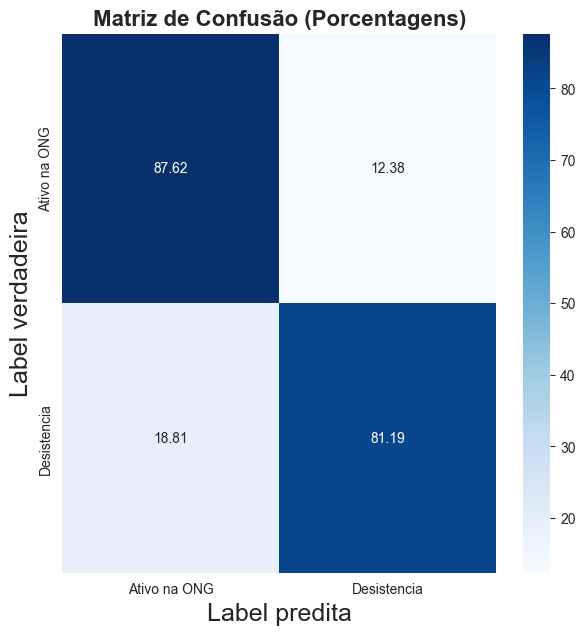


Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       824
           1       0.87      0.81      0.84       824

    accuracy                           0.84      1648
   macro avg       0.85      0.84      0.84      1648
weighted avg       0.85      0.84      0.84      1648


Roc Curve



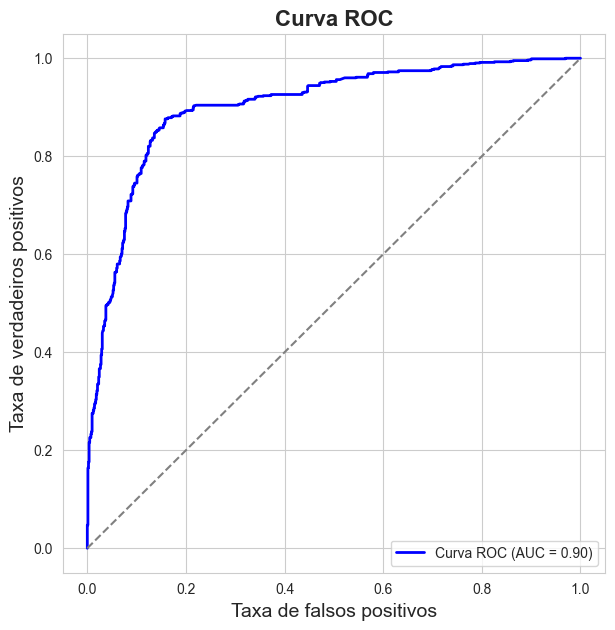

In [433]:
roda_modelo(modelo_logistico)

In [434]:
from sklearn.tree import DecisionTreeClassifier

modelo_tree = DecisionTreeClassifier()


------------------------------Resultados DecisionTreeClassifier()------------------------------

AUC 0.9997128028089357
M√©trica KS: KstestResult(statistic=np.float64(0.007281553398058253), pvalue=np.float64(0.9999999999939724), statistic_location=np.float64(0.5), statistic_sign=np.int8(-1))

Confusion Matrix


Confusion Matrix



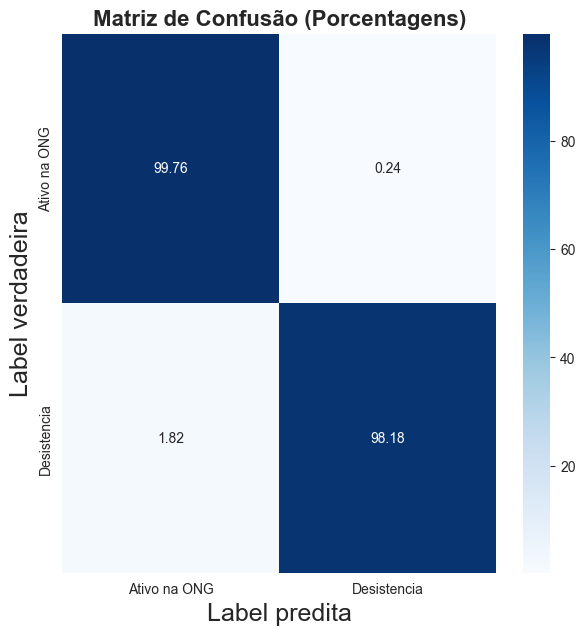


Classification Report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       824
           1       1.00      0.98      0.99       824

    accuracy                           0.99      1648
   macro avg       0.99      0.99      0.99      1648
weighted avg       0.99      0.99      0.99      1648


Roc Curve



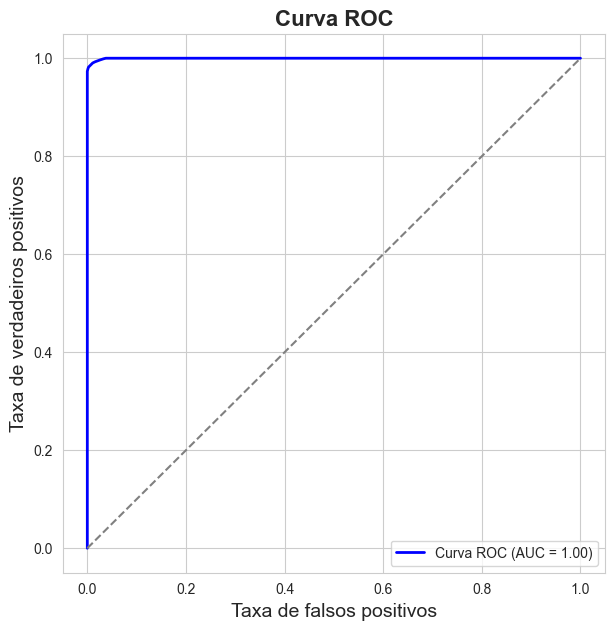

In [435]:
roda_modelo(modelo_tree)

In [436]:
from sklearn.ensemble import GradientBoostingClassifier
modelo_xgb = GradientBoostingClassifier() 


------------------------------Resultados GradientBoostingClassifier()------------------------------

AUC 0.9931374599396738
M√©trica KS: KstestResult(statistic=np.float64(0.25910194174757284), pvalue=np.float64(5.184265924488781e-49), statistic_location=np.float64(0.011176103211933236), statistic_sign=np.int8(-1))

Confusion Matrix


Confusion Matrix



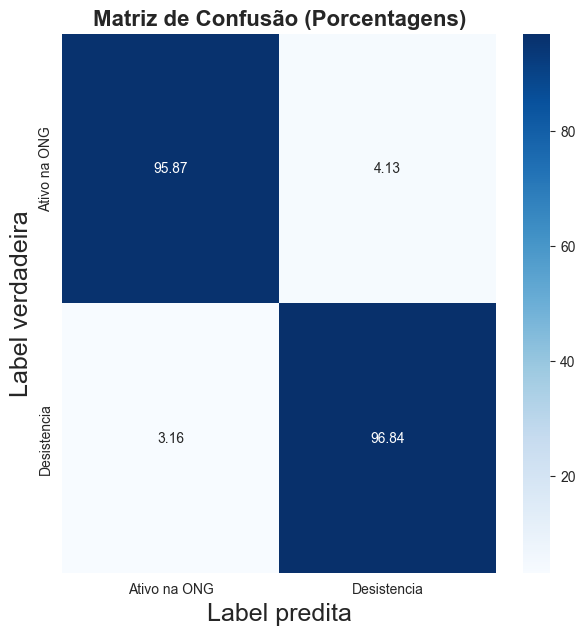


Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       824
           1       0.96      0.97      0.96       824

    accuracy                           0.96      1648
   macro avg       0.96      0.96      0.96      1648
weighted avg       0.96      0.96      0.96      1648


Roc Curve



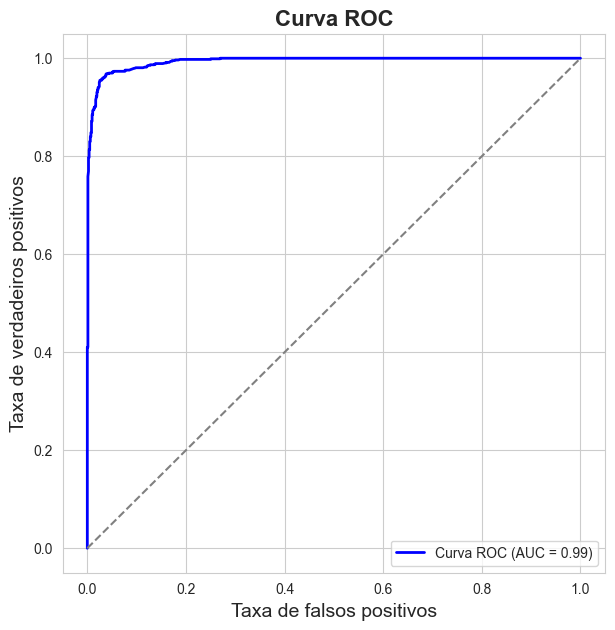

In [437]:
roda_modelo(modelo_xgb)

In [438]:
# salvando o modelo
import joblib

joblib.dump(modelo_xgb, r'Model_XGB.joblib')

['Model_XGB.joblib']

In [489]:
# Creating a sample dataframe
data = {
    'NOME': ['Aluno 1', 'Aluno 2', 'Aluno 3', 'Aluno 4', 'Aluno 5'],
    'FASE_2020': [1, 2, 3, 4, 5],
    'FASE_2021': [2, 3, 4, 5, 6],
    'FASE_2022': [3, 4, 5, 6, 7],
    'PEDRA_2020': ['Ametista', 'Quartzo', '√Ågata', 'Top√°zio', 'Ametista'],
    'PEDRA_2021': ['Quartzo', '√Ågata', 'Top√°zio', 'Ametista', 'Quartzo'],
    'PEDRA_2022': ['√Ågata', 'Top√°zio', 'Ametista', 'Quartzo', '√Ågata'],
    'PONTO_VIRADA_2020': [0, 1, 0, 1, 0],
    'PONTO_VIRADA_2021': [1, 0, 1, 0, 1],
    'PONTO_VIRADA_2022': [0, 1, 0, 1, 0],
    'ANO_INGRESSO': [2018, 2019, 2020, 2021, 2022],
    'dimensao_academica': ['excelente', 'abaixo da media', 'excelente', 'abaixo da media', 'excelente'],
    'dimensao_psicossocial': ['excelente', 'excelente', 'abaixo da media', 'excelente', 'abaixo da media'],
    'dimensao_psicopedagogica': ['excelente', 'abaixo da media', 'excelente', 'excelente', 'abaixo da media']#,
    # 'ATIVO': [1, 0, 1, 0, 1]
}

df_test_model_xgb = pd.DataFrame(data)

In [491]:
df_test_model_xgb = novo_pipeline(df_test_model_xgb)

O target 'ATIVO' n√£o est√° no DataFrame


In [494]:
df_test_model_xgb

dimensao_psicopedagogica_abaixo da media  \
0                                       0.0   
1                                       1.0   
2                                       0.0   
3                                       0.0   
4                                       1.0   

   dimensao_psicopedagogica_excelente  dimensao_academica_abaixo da media  \
0                                 1.0                                 0.0   
1                                 0.0                                 1.0   
2                                 1.0                                 0.0   
3                                 1.0                                 1.0   
4                                 0.0                                 0.0   

   dimensao_academica_excelente  dimensao_psicossocial_abaixo da media  \
0                           1.0                                    0.0   
1                           0.0                                    0.0   
2                           1.0                                    1.0   
3                           0.0                                    0.0   
4                           1.0                                    1.0   

   dimensao_psicossocial_excelente  PEDRA_2020_Ametista  PEDRA_2020_Quartzo  \
0                              1.0                  1.0                 0.0   
1                              1.0                  0.0                 1.0   
2                              0.0                  0.0                 0.0   
3                              1.0                  0.0                 0.0   
4                              0.0                  1.0                 0.0   

   PEDRA_2020_Top√°zio  PEDRA_2020_√Ågata  ...  PEDRA_2022_Quartzo  \
0                 0.0               0.0  ...                 0.0   
1                 0.0               0.0  ...                 0.0   
2                 0.0               1.0  ...                 0.0   
3                 1.0               0.0  ...                 1.0   
4                 0.0               0.0  ...                 0.0   

   PEDRA_2022_Top√°zio  PEDRA_2022_√Ågata  FASE_2020  FASE_2021  FASE_2022  \
0                 0.0               1.0        0.0        0.0        0.0   
1                 1.0               0.0        1.0        1.0        1.0   
2                 0.0               0.0        2.0        2.0        2.0   
3                 0.0               0.0        3.0        3.0        3.0   
4                 0.0               1.0        4.0        4.0        4.0   

   PONTO_VIRADA_2020  PONTO_VIRADA_2021  PONTO_VIRADA_2022  ANO_INGRESSO  
0                0.0                1.0                0.0          2018  
1                1.0                0.0                1.0          2019  
2                0.0                1.0                0.0          2020  
3                1.0                0.0                1.0          2021  
4                0.0                1.0                0.0          2022  

[5 rows x 25 columns]

In [493]:
# testando o modelo salvo
model_xgb = joblib.load(r'Model_XGB.joblib')
predictions = model_xgb.predict(df_test_model_xgb)
print(predictions)

[1 1 1 0 0]
